# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

In [1]:
# !pip install --upgrade pip
# !pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

## Importar librerías

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings

#Quitar advertencias en los codigos
warnings.filterwarnings('ignore')

## Establecer apariencia general de los gráficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie Penguin (Pygoscelis adeliae)': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [4]:
raw_pinguins_df = palmerpenguins.load_penguins_raw()

#### Datos previamente procesados

In [5]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de `seaborn`

In [6]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [7]:
preprocess_penguins_df = pd.read_csv('data\penguins_raw.csv')

preprocess_penguins_df = preprocess_penguins_df.drop(columns=['Comments'])

preprocess_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           3750.0    MALE                NaN                NaN  
1           3800.0  FEMALE            8.94956          -24.69454  
2           3250.0  FEMALE            8.36821          -25.33302  
3              NaN     NaN                NaN                NaN  
4           3450.0  FEMALE            8.76651          -25.32426  
..             ...     ...                ...                ...  
339         4000.0    MALE            9.70465          -24.53494  
340         3400.0  FEMALE            9.37608          -24.40753  
341         3775.0    MALE            9.46180          -24.70615  
342         4100.0    MALE            9.98044          -24.68741  
343         3775.0  FEMALE            9.39305          -24.25255  

[344 rows x 16 columns]

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [8]:
preprocess_penguins_df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [9]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

object     9
float64    6
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [10]:
preprocess_penguins_df.shape

(344, 16)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

studyName              False
Sample Number          False
Species                False
Region                 False
Island                 False
Stage                  False
Individual ID          False
Clutch Completion      False
Date Egg               False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
Delta 15 N (o/oo)       True
Delta 13 C (o/oo)       True
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

46

## ¿Cuál es la proporción de valores nulos por cada variable?

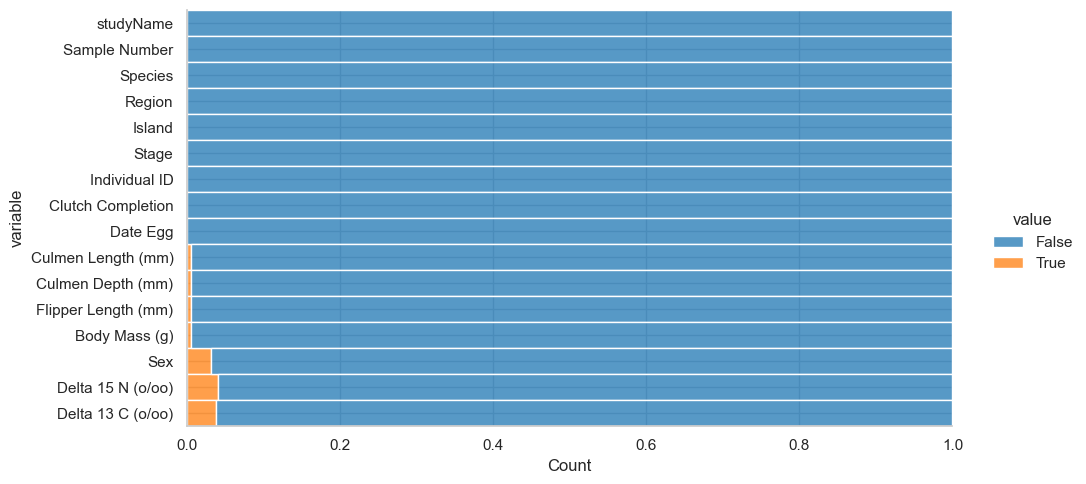

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

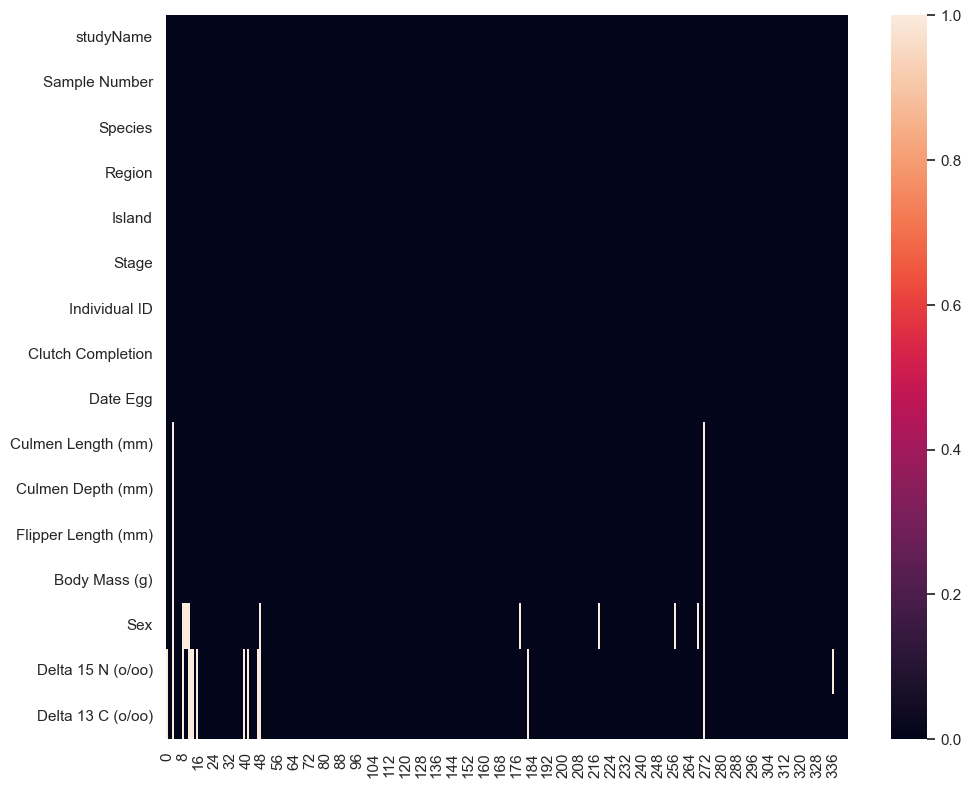

In [15]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data = df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [16]:
preprocess_penguins_df = preprocess_penguins_df.dropna()

preprocess_penguins_df

studyName  Sample Number                                    Species  \
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
5     PAL0708              6        Adelie Penguin (Pygoscelis adeliae)   
6     PAL0708              7        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
5    Anvers  Torgersen  Adult, 1 Egg Stage          N3A2               Yes   
6    Anvers  Torgersen  Adult, 1 Egg Stage          N4A1                No   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
4    2007-11-16                36.7               19.3                193.0   
5    2007-11-16                39.3               20.6                190.0   
6    2007-11-15                38.9               17.8                181.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
1           3800.0  FEMALE            8.94956          -24.69454  
2           3250.0  FEMALE            8.36821          -25.33302  
4           3450.0  FEMALE            8.76651          -25.32426  
5           3650.0    MALE            8.66496          -25.29805  
6           3625.0  FEMALE            9.18718          -25.21799  
..             ...     ...                ...                ...  
339         4000.0    MALE            9.70465          -24.53494  
340         3400.0  FEMALE            9.37608          -24.40753  
341         3775.0    MALE            9.46180          -24.70615  
342         4100.0    MALE            9.98044          -24.68741  
343         3775.0  FEMALE            9.39305          -24.25255  

[324 rows x 16 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
preprocess_penguins_df.describe(include='all')

studyName  Sample Number                              Species  Region  \
count        324     324.000000                                  324     324   
unique         3            NaN                                    3       1   
top      PAL0910            NaN  Adelie Penguin (Pygoscelis adeliae)  Anvers   
freq         116            NaN                                  139     324   
mean         NaN      64.595679                                  NaN     NaN   
std          NaN      40.226373                                  NaN     NaN   
min          NaN       1.000000                                  NaN     NaN   
25%          NaN      31.000000                                  NaN     NaN   
50%          NaN      59.500000                                  NaN     NaN   
75%          NaN      96.250000                                  NaN     NaN   
max          NaN     152.000000                                  NaN     NaN   

        Island               Stage Individual ID Clutch Completion  \
count      324                 324           324               324   
unique       3                   1           188                 2   
top     Biscoe  Adult, 1 Egg Stage         N69A1               Yes   
freq       162                 324             3               290   
mean       NaN                 NaN           NaN               NaN   
std        NaN                 NaN           NaN               NaN   
min        NaN                 NaN           NaN               NaN   
25%        NaN                 NaN           NaN               NaN   
50%        NaN                 NaN           NaN               NaN   
75%        NaN                 NaN           NaN               NaN   
max        NaN                 NaN           NaN               NaN   

          Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
count          324          324.000000         324.000000   
unique          50                 NaN                NaN   
top     2007-11-27                 NaN                NaN   
freq            18                 NaN                NaN   
mean           NaN           44.053395          17.127469   
std            NaN            5.480635           1.967385   
min            NaN           32.100000          13.100000   
25%            NaN           39.500000          15.575000   
50%            NaN           44.950000          17.300000   
75%            NaN           48.700000          18.600000   
max            NaN           59.600000          21.500000   

        Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
count            324.000000     324.000000     324         324.000000   
unique                  NaN            NaN       2                NaN   
top                     NaN            NaN  FEMALE                NaN   
freq                    NaN            NaN     163                NaN   
mean             201.216049    4213.966049     NaN           8.739944   
std               13.958683     809.277529     NaN           0.552073   
min              172.000000    2700.000000     NaN           7.632200   
25%              190.000000    3550.000000     NaN           8.304440   
50%              197.000000    4050.000000     NaN           8.658585   
75%              213.000000    4800.000000     NaN           9.181477   
max              231.000000    6300.000000     NaN          10.025440   

        Delta 13 C (o/oo)  
count          324.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean           -25.688691  
std              0.790840  
min            -27.018540  
25%            -26.326780  
50%            -25.842775  
75%            -25.055572  
max            -23.890170

### Solo las numéricas

In [18]:
preprocess_penguins_df.describe(include=[np.number])

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     324.000000          324.000000         324.000000   
mean       64.595679           44.053395          17.127469   
std        40.226373            5.480635           1.967385   
min         1.000000           32.100000          13.100000   
25%        31.000000           39.500000          15.575000   
50%        59.500000           44.950000          17.300000   
75%        96.250000           48.700000          18.600000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           324.000000     324.000000         324.000000   
mean            201.216049    4213.966049           8.739944   
std              13.958683     809.277529           0.552073   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.304440   
50%             197.000000    4050.000000           8.658585   
75%             213.000000    4800.000000           9.181477   
max             231.000000    6300.000000          10.025440   

       Delta 13 C (o/oo)  
count         324.000000  
mean          -25.688691  
std             0.790840  
min           -27.018540  
25%           -26.326780  
50%           -25.842775  
75%           -25.055572  
max           -23.890170

### Solo categóricas - 1

In [19]:
preprocess_penguins_df.describe(include=object)

studyName                              Species  Region  Island  \
count        324                                  324     324     324   
unique         3                                    3       1       3   
top      PAL0910  Adelie Penguin (Pygoscelis adeliae)  Anvers  Biscoe   
freq         116                                  139     324     162   

                     Stage Individual ID Clutch Completion    Date Egg     Sex  
count                  324           324               324         324     324  
unique                   1           188                 2          50       2  
top     Adult, 1 Egg Stage         N69A1               Yes  2007-11-27  FEMALE  
freq                   324             3               290          18     163

### Solo categóricas - 2

In [20]:
preprocess_penguins_df.astype({'Species':'category',
                               'Island': 'category',
                               'Sex':'category'}).describe(include='category')

Species  Island     Sex
count                                   324     324     324
unique                                    3       3       2
top     Adelie Penguin (Pygoscelis adeliae)  Biscoe  FEMALE
freq                                    139     162     163

## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

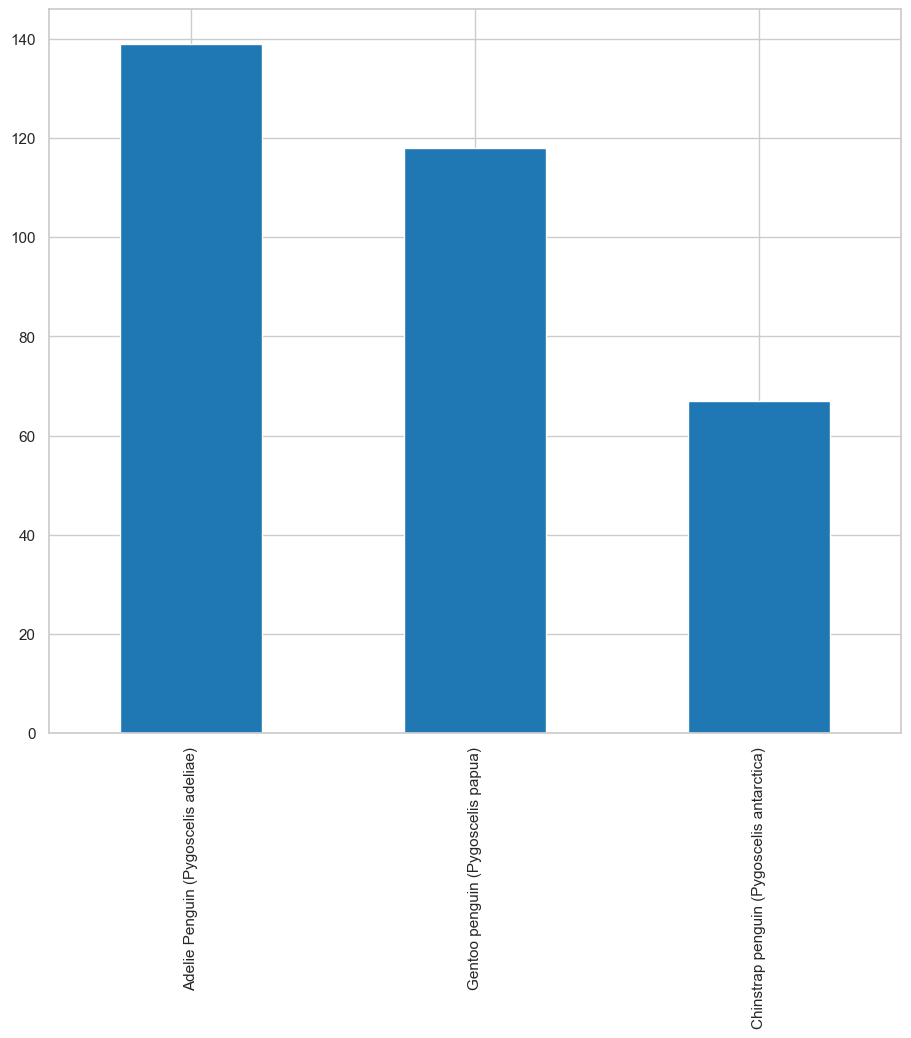

In [21]:
preprocess_penguins_df.Species.value_counts().plot(kind ='bar')

### Seaborn

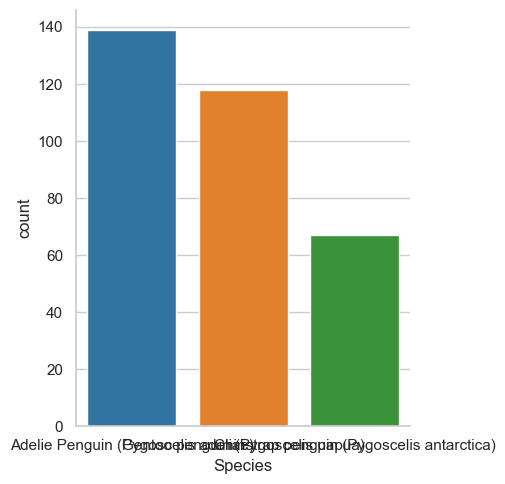

In [22]:
sns.catplot(
    data=preprocess_penguins_df,
    x='Species',
    kind='count')

### ¿Cómo visualizar las proporciones?

<AxesSubplot: xlabel='Species', ylabel='count'>

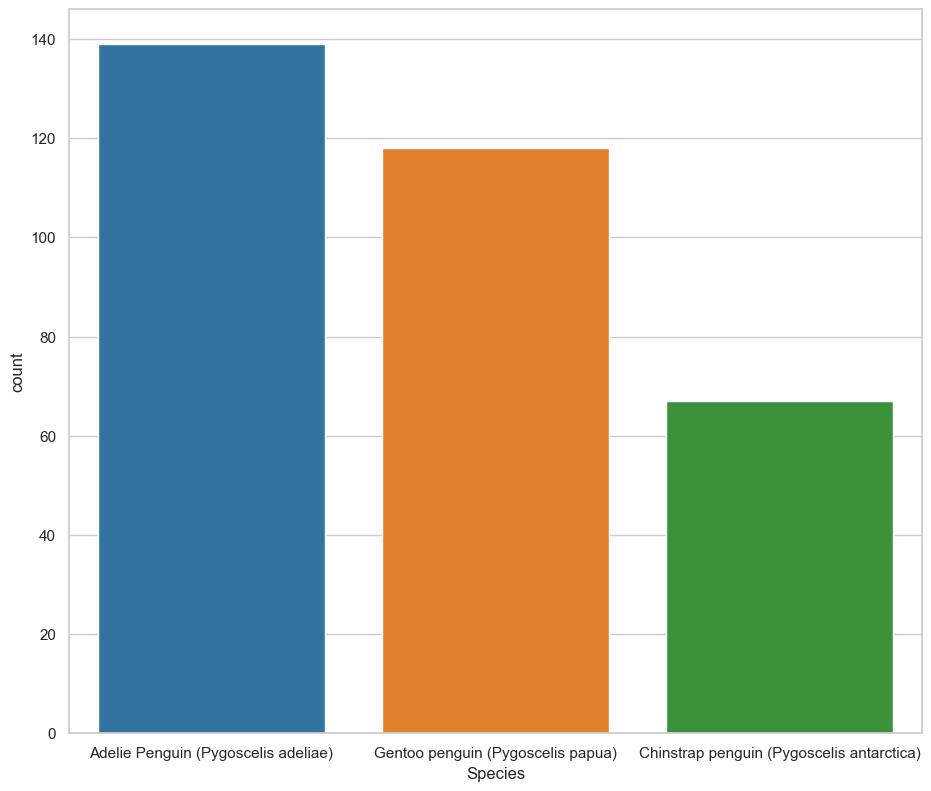

In [23]:
preprocess_penguins_df.value_counts('Species',sort=True).reset_index(name='count').pipe(
    lambda df:(sns.barplot(
        data=df,
        x='Species',
        y='count'
    ))
)

## ¿Como se visualizan las proporciones?

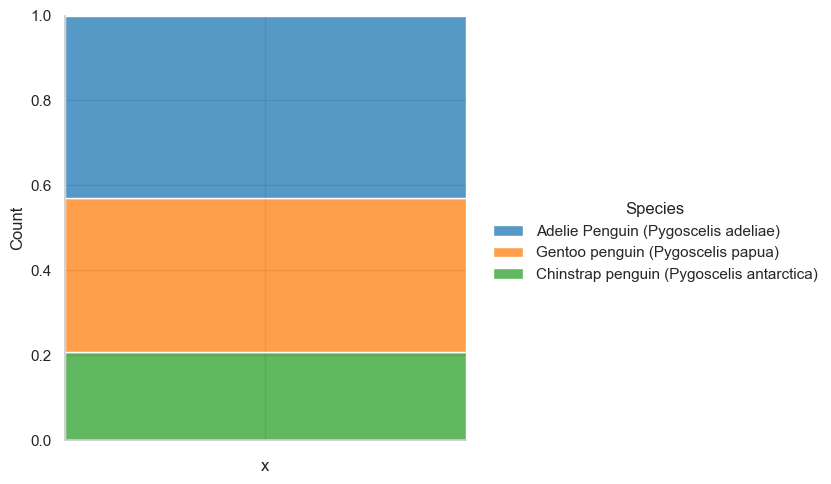

In [24]:
preprocess_penguins_df.add_column('x','').pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='Species',
                multiple='fill'
            )
        )
    )


# Medidas de tendencia central

## Media o promedio

In [25]:
preprocess_penguins_df['Body Mass (g)'].mean()

4213.966049382716

In [26]:
np.mean(preprocess_penguins_df['Body Mass (g)'])

4213.966049382716

In [27]:
preprocess_penguins_df.mean()

Sample Number            64.595679
Culmen Length (mm)       44.053395
Culmen Depth (mm)        17.127469
Flipper Length (mm)     201.216049
Body Mass (g)          4213.966049
Delta 15 N (o/oo)         8.739944
Delta 13 C (o/oo)       -25.688691
dtype: float64

## Mediana

In [28]:
preprocess_penguins_df.median()

Sample Number            59.500000
Culmen Length (mm)       44.950000
Culmen Depth (mm)        17.300000
Flipper Length (mm)     197.000000
Body Mass (g)          4050.000000
Delta 15 N (o/oo)         8.658585
Delta 13 C (o/oo)       -25.842775
dtype: float64

## Moda

In [29]:
preprocess_penguins_df.mode()

studyName  Sample Number                              Species  Region  \
0     PAL0910            2.0  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1         NaN            3.0                                  NaN     NaN   
2         NaN            5.0                                  NaN     NaN   
3         NaN            6.0                                  NaN     NaN   
4         NaN            7.0                                  NaN     NaN   
..        ...            ...                                  ...     ...   
319       NaN            NaN                                  NaN     NaN   
320       NaN            NaN                                  NaN     NaN   
321       NaN            NaN                                  NaN     NaN   
322       NaN            NaN                                  NaN     NaN   
323       NaN            NaN                                  NaN     NaN   

     Island               Stage Individual ID Clutch Completion    Date Egg  \
0    Biscoe  Adult, 1 Egg Stage         N13A1               Yes  2007-11-27   
1       NaN                 NaN         N13A2               NaN         NaN   
2       NaN                 NaN         N18A1               NaN         NaN   
3       NaN                 NaN         N18A2               NaN         NaN   
4       NaN                 NaN         N21A1               NaN         NaN   
..      ...                 ...           ...               ...         ...   
319     NaN                 NaN           NaN               NaN         NaN   
320     NaN                 NaN           NaN               NaN         NaN   
321     NaN                 NaN           NaN               NaN         NaN   
322     NaN                 NaN           NaN               NaN         NaN   
323     NaN                 NaN           NaN               NaN         NaN   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  45.2               17.0                190.0   
1                   NaN                NaN                  NaN   
2                   NaN                NaN                  NaN   
3                   NaN                NaN                  NaN   
4                   NaN                NaN                  NaN   
..                  ...                ...                  ...   
319                 NaN                NaN                  NaN   
320                 NaN                NaN                  NaN   
321                 NaN                NaN                  NaN   
322                 NaN                NaN                  NaN   
323                 NaN                NaN                  NaN   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           3800.0  FEMALE            7.63220          -27.01854  
1              NaN     NaN            7.63452          -26.95470  
2              NaN     NaN            7.63884          -26.89644  
3              NaN     NaN            7.68528          -26.86485  
4              NaN     NaN            7.68870          -26.86352  
..             ...     ...                ...                ...  
319            NaN     NaN            9.93727          -24.17282  
320            NaN     NaN            9.98044          -24.16566  
321            NaN     NaN           10.02019          -24.10255  
322            NaN     NaN           10.02372          -23.90309  
323            NaN     NaN           10.02544          -23.89017  

[324 rows x 16 columns]

In [30]:
preprocess_penguins_df.describe(include=object)

studyName                              Species  Region  Island  \
count        324                                  324     324     324   
unique         3                                    3       1       3   
top      PAL0910  Adelie Penguin (Pygoscelis adeliae)  Anvers  Biscoe   
freq         116                                  139     324     162   

                     Stage Individual ID Clutch Completion    Date Egg     Sex  
count                  324           324               324         324     324  
unique                   1           188                 2          50       2  
top     Adult, 1 Egg Stage         N69A1               Yes  2007-11-27  FEMALE  
freq                   324             3               290          18     163

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [31]:
preprocess_penguins_df.max(numeric_only=True)

Sample Number           152.00000
Culmen Length (mm)       59.60000
Culmen Depth (mm)        21.50000
Flipper Length (mm)     231.00000
Body Mass (g)          6300.00000
Delta 15 N (o/oo)        10.02544
Delta 13 C (o/oo)       -23.89017
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [32]:
preprocess_penguins_df.min(numeric_only=True)

Sample Number             1.00000
Culmen Length (mm)       32.10000
Culmen Depth (mm)        13.10000
Flipper Length (mm)     172.00000
Body Mass (g)          2700.00000
Delta 15 N (o/oo)         7.63220
Delta 13 C (o/oo)       -27.01854
dtype: float64

## ¿Cuál es el rango de las variables?

In [33]:
preprocess_penguins_df.max(numeric_only=True) - preprocess_penguins_df.min(numeric_only=True)

Sample Number           151.00000
Culmen Length (mm)       27.50000
Culmen Depth (mm)         8.40000
Flipper Length (mm)      59.00000
Body Mass (g)          3600.00000
Delta 15 N (o/oo)         2.39324
Delta 13 C (o/oo)         3.12837
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [34]:
#Desviacion estandar
preprocess_penguins_df.std()

Sample Number           40.226373
Culmen Length (mm)       5.480635
Culmen Depth (mm)        1.967385
Flipper Length (mm)     13.958683
Body Mass (g)          809.277529
Delta 15 N (o/oo)        0.552073
Delta 13 C (o/oo)        0.790840
dtype: float64

In [35]:
#Calculamos la media
preprocess_penguins_df.mean()

Sample Number            64.595679
Culmen Length (mm)       44.053395
Culmen Depth (mm)        17.127469
Flipper Length (mm)     201.216049
Body Mass (g)          4213.966049
Delta 15 N (o/oo)         8.739944
Delta 13 C (o/oo)       -25.688691
dtype: float64

In [36]:
#Rango de limites

#superior
superior = preprocess_penguins_df['Culmen Length (mm)'].mean() + preprocess_penguins_df['Culmen Length (mm)'].std()

inferior =  preprocess_penguins_df['Culmen Length (mm)'].mean() - preprocess_penguins_df['Culmen Length (mm)'].std()

print(superior,inferior)
#Con este rango ya nos aseguramos que estamos capturando el 65% de nuestros datos suponiendo que nuestros 
#datos sigue una distribucion normal


49.53402977487275 38.57276034858404


## ¿Cuál es el rango intercuartílico?

In [37]:
#llamamos la media por medio de quartiles 
preprocess_penguins_df.quantile(0.50)

#vamos a traer el quartile
preprocess_penguins_df.quantile(0.75)

Sample Number            96.250000
Culmen Length (mm)       48.700000
Culmen Depth (mm)        18.600000
Flipper Length (mm)     213.000000
Body Mass (g)          4800.000000
Delta 15 N (o/oo)         9.181477
Delta 13 C (o/oo)       -25.055572
Name: 0.75, dtype: float64

In [38]:
preprocess_penguins_df.quantile(0.25)

Sample Number            31.00000
Culmen Length (mm)       39.50000
Culmen Depth (mm)        15.57500
Flipper Length (mm)     190.00000
Body Mass (g)          3550.00000
Delta 15 N (o/oo)         8.30444
Delta 13 C (o/oo)       -26.32678
Name: 0.25, dtype: float64

In [39]:
# vamos a calcular el rango intercuartilico

preprocess_penguins_df.quantile(0.75) - preprocess_penguins_df.quantile(0.25)

#Calulamos el 50% de nuestros datos

Sample Number            65.250000
Culmen Length (mm)        9.200000
Culmen Depth (mm)         3.025000
Flipper Length (mm)      23.000000
Body Mass (g)          1250.000000
Delta 15 N (o/oo)         0.877038
Delta 13 C (o/oo)         1.271208
dtype: float64

In [40]:
(
    preprocess_penguins_df.quantile(q=[0.75,0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

variable         0.75          0.5        0.25          iqr
0        Sample Number    96.250000    59.500000    31.00000    65.250000
1   Culmen Length (mm)    48.700000    44.950000    39.50000     9.200000
2    Culmen Depth (mm)    18.600000    17.300000    15.57500     3.025000
3  Flipper Length (mm)   213.000000   197.000000   190.00000    23.000000
4        Body Mass (g)  4800.000000  4050.000000  3550.00000  1250.000000
5    Delta 15 N (o/oo)     9.181477     8.658585     8.30444     0.877038
6    Delta 13 C (o/oo)   -25.055572   -25.842775   -26.32678     1.271208

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

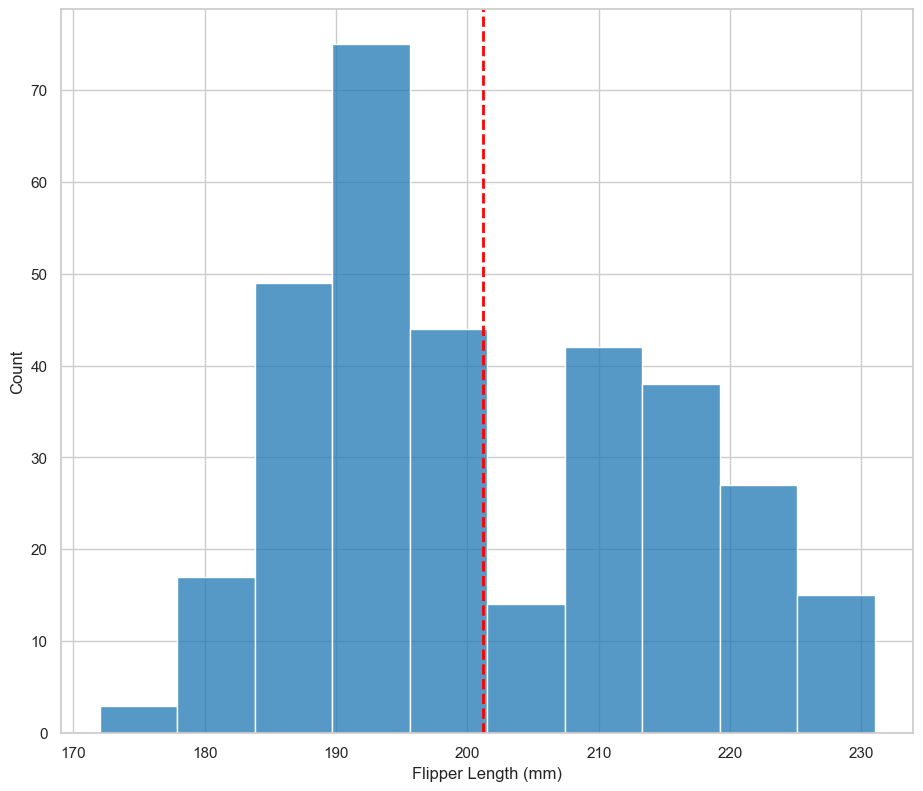

In [41]:
sns.histplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)'
)

plt.axvline(
    x =preprocess_penguins_df['Flipper Length (mm)'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)



### Diagrama de caja / boxplot

<AxesSubplot: xlabel='Flipper Length (mm)'>

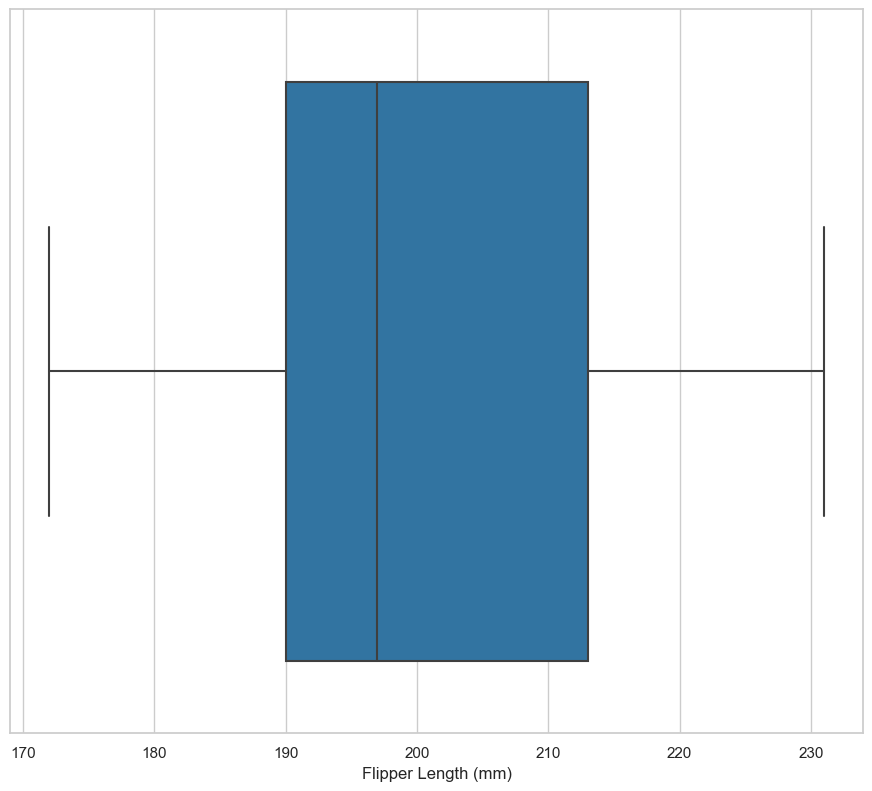

In [42]:
sns.boxplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)'
)

### Limitaciones

In [43]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

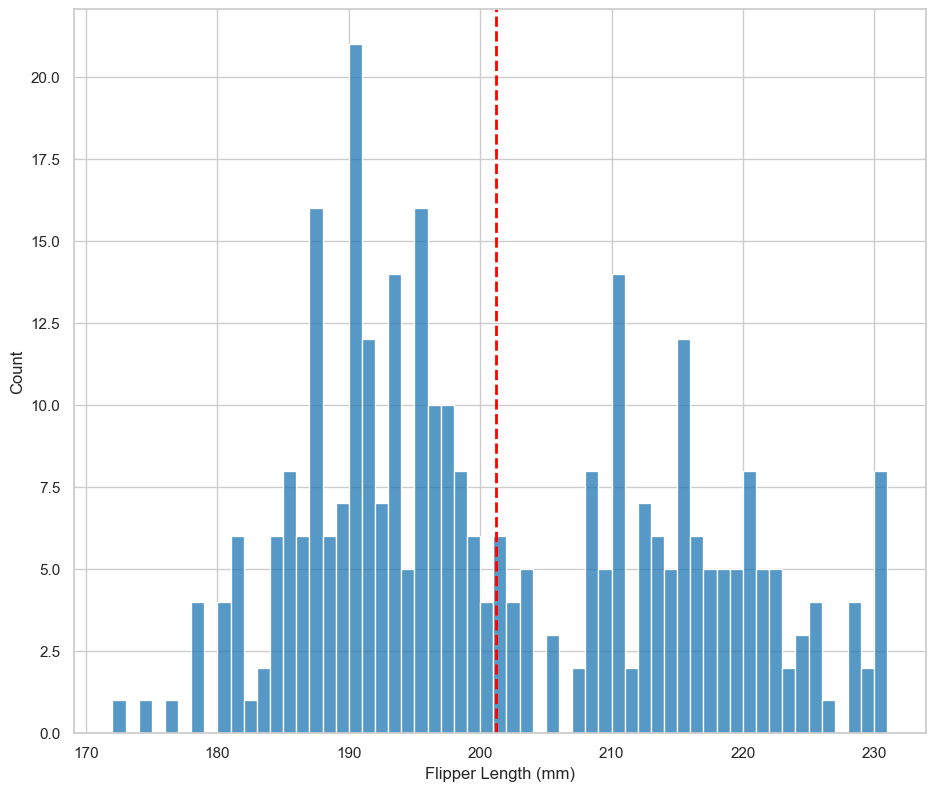

In [44]:
sns.histplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    binwidth=1
)


plt.axvline(
    x =preprocess_penguins_df['Flipper Length (mm)'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Probability'>

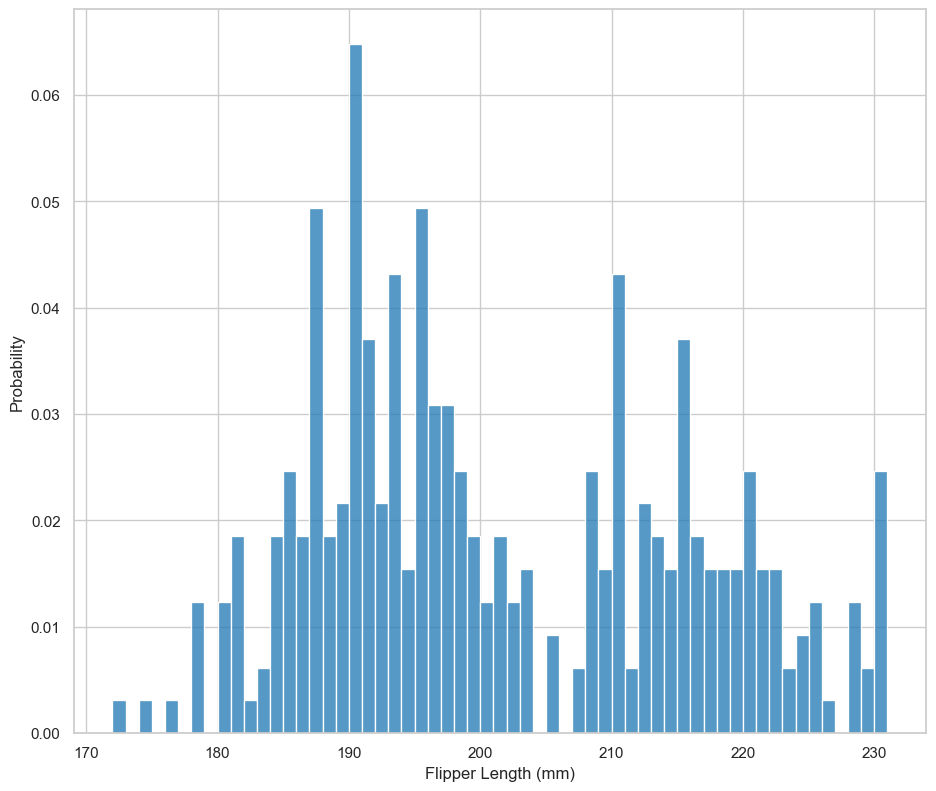

In [45]:
sns.histplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    binwidth=1,
    stat='probability'
)

### Utilizando `empiricaldist`

In [46]:
pmf_flipper_length = empiricaldist.Pmf.from_seq(
    preprocess_penguins_df['Flipper Length (mm)'],
    normalize=True
)

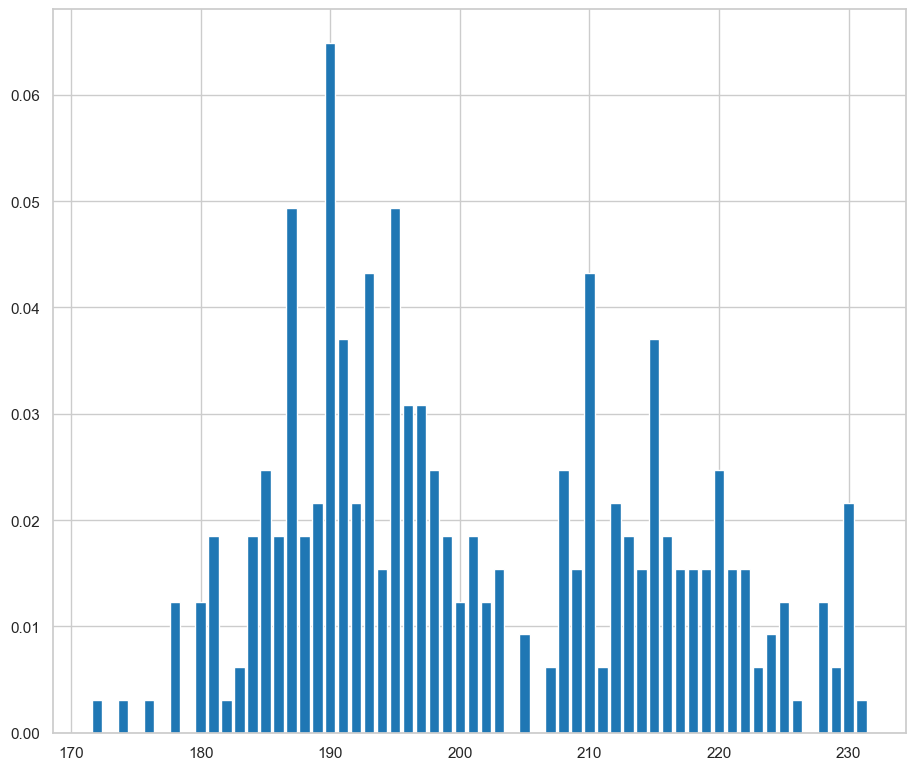

In [47]:
pmf_flipper_length.bar()

In [48]:
pmf_flipper_length(190)

0.06481481481481481

In [49]:
preprocess_penguins_df['Flipper Length (mm)'].max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Proportion'>

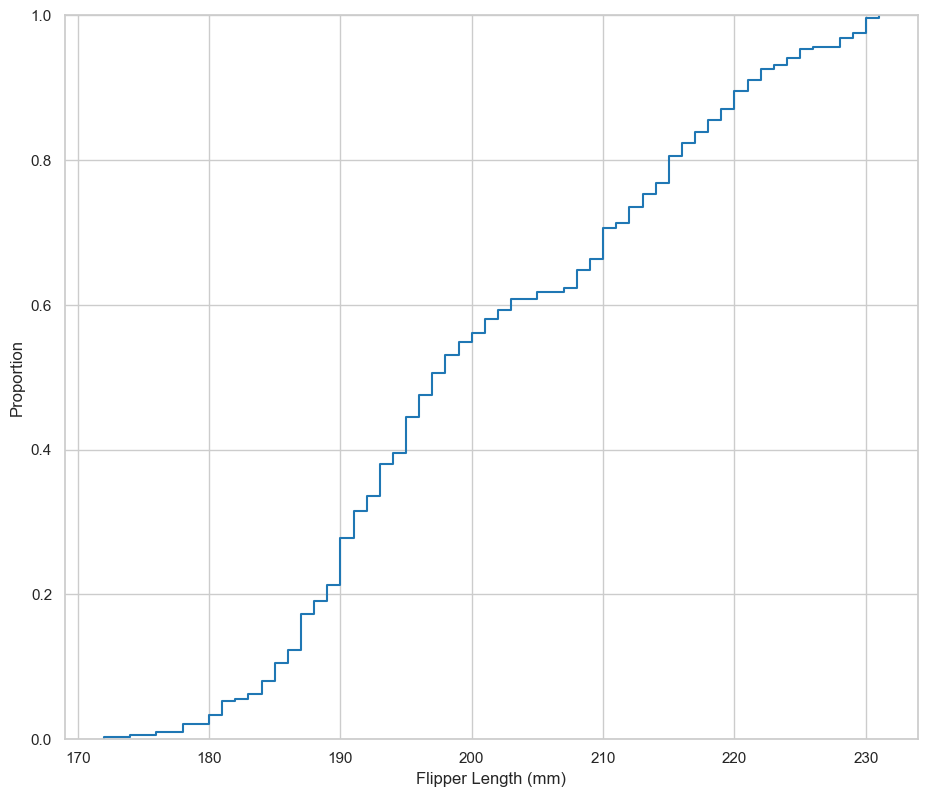

In [50]:
sns.ecdfplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)'
)

### Utilizando `empiricaldist`

In [51]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(
    preprocess_penguins_df['Flipper Length (mm)'],
    normalize=True
)

cdf_flipper_length

172.0    0.003086
174.0    0.006173
176.0    0.009259
178.0    0.021605
180.0    0.033951
181.0    0.052469
182.0    0.055556
183.0    0.061728
184.0    0.080247
185.0    0.104938
186.0    0.123457
187.0    0.172840
188.0    0.191358
189.0    0.212963
190.0    0.277778
191.0    0.314815
192.0    0.336420
193.0    0.379630
194.0    0.395062
195.0    0.444444
196.0    0.475309
197.0    0.506173
198.0    0.530864
199.0    0.549383
200.0    0.561728
201.0    0.580247
202.0    0.592593
203.0    0.608025
205.0    0.617284
207.0    0.623457
208.0    0.648148
209.0    0.663580
210.0    0.706790
211.0    0.712963
212.0    0.734568
213.0    0.753086
214.0    0.768519
215.0    0.805556
216.0    0.824074
217.0    0.839506
218.0    0.854938
219.0    0.870370
220.0    0.895062
221.0    0.910494
222.0    0.925926
223.0    0.932099
224.0    0.941358
225.0    0.953704
226.0    0.956790
228.0    0.969136
229.0    0.975309
230.0    0.996914
231.0    1.000000
Name: , dtype: float64

230 0.9969135802469136


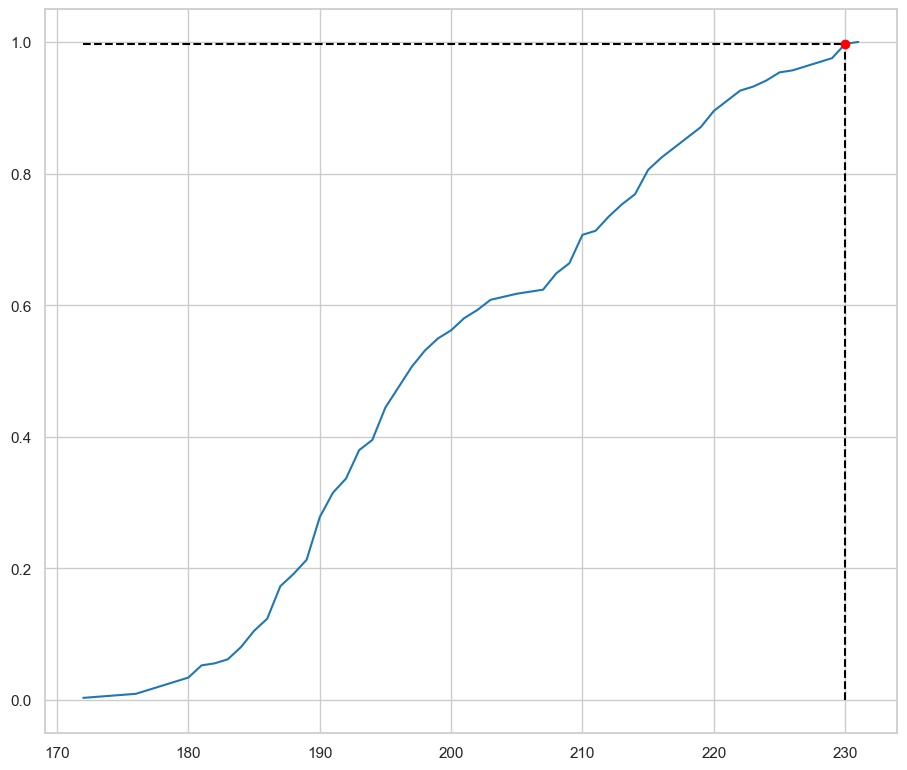

In [52]:
cdf_flipper_length.plot()

q= 230
p= cdf_flipper_length.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')
print(q,p)

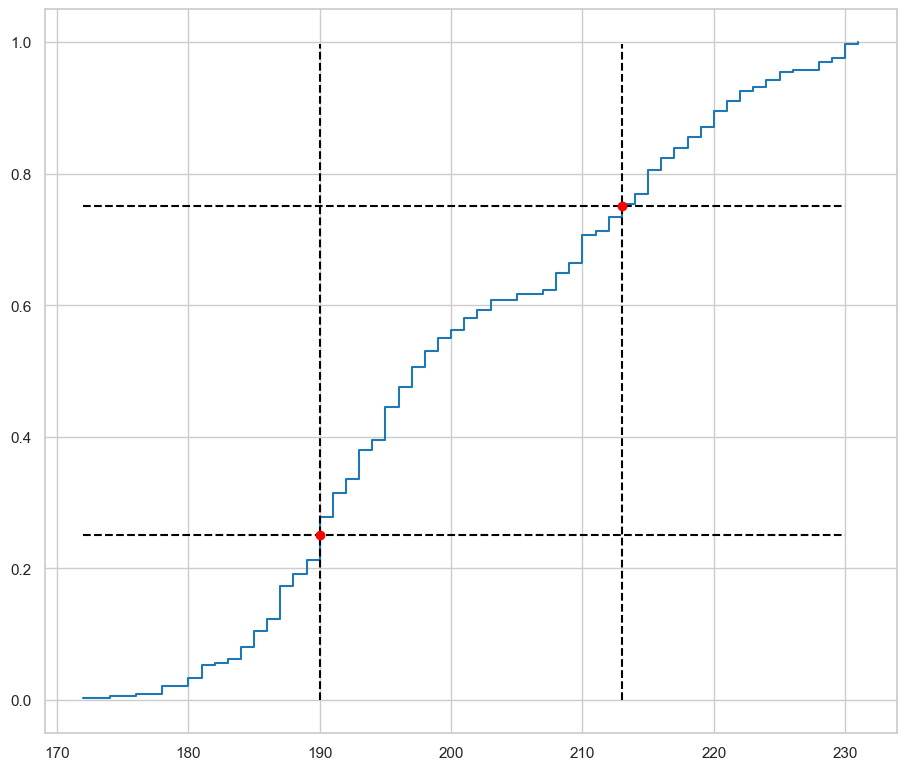

In [53]:
#Cuartiles

cdf_flipper_length.step()

p_1 = 0.25
p_2 = 0.75

ps = (0.25,0.75)
qs = cdf_flipper_length.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder= 2
)

### Comparando distribuciones

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Proportion'>

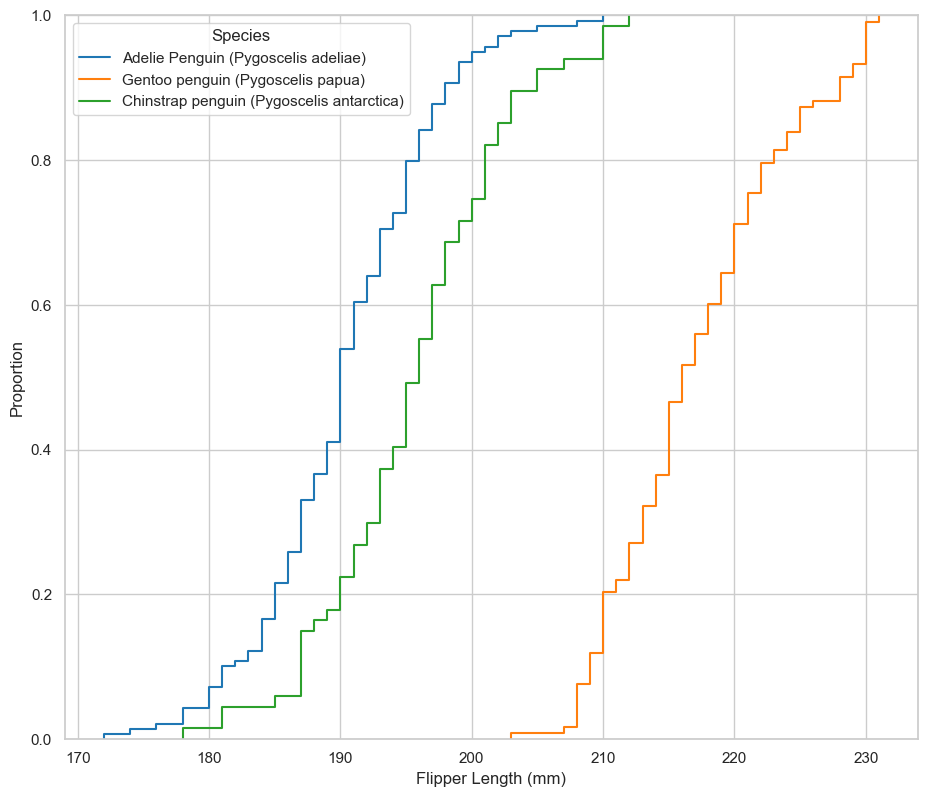

In [54]:
sns.ecdfplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    hue='Species'
)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Density'>

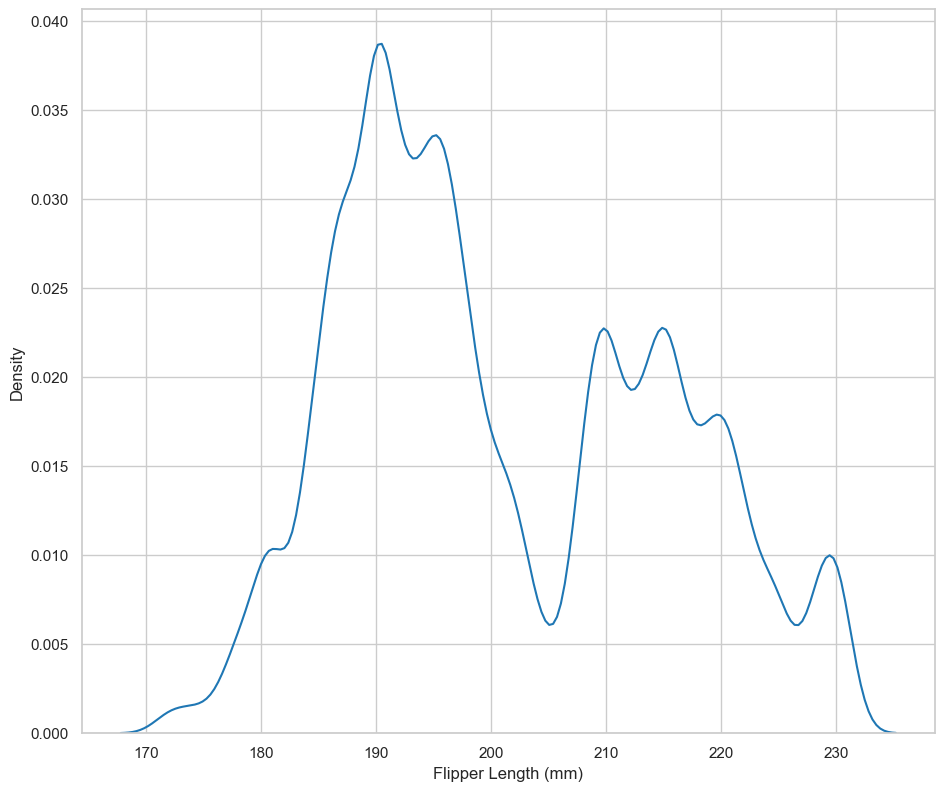

In [55]:
sns.kdeplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    bw_method=0.1
)

In [56]:
stats = preprocess_penguins_df['Flipper Length (mm)'].describe()
stats

count    324.000000
mean     201.216049
std       13.958683
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64

<AxesSubplot: >

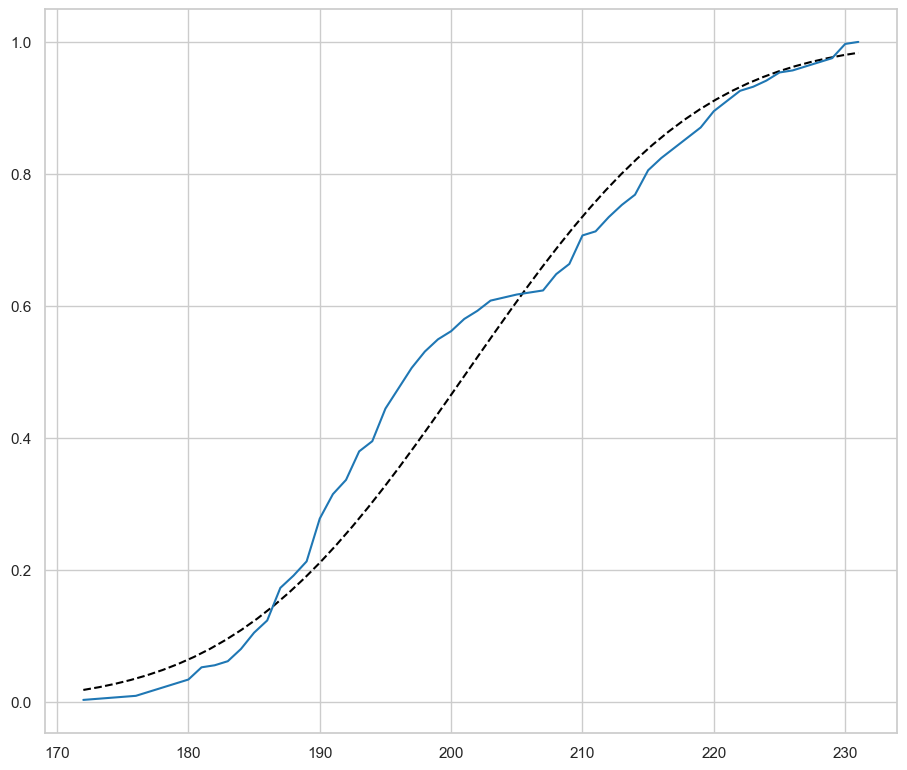

In [57]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs,ys, color = 'black', linestyle = 'dashed' )

empiricaldist.Cdf.from_seq(
    preprocess_penguins_df['Flipper Length (mm)'],
    normalize = True
).plot()

[]

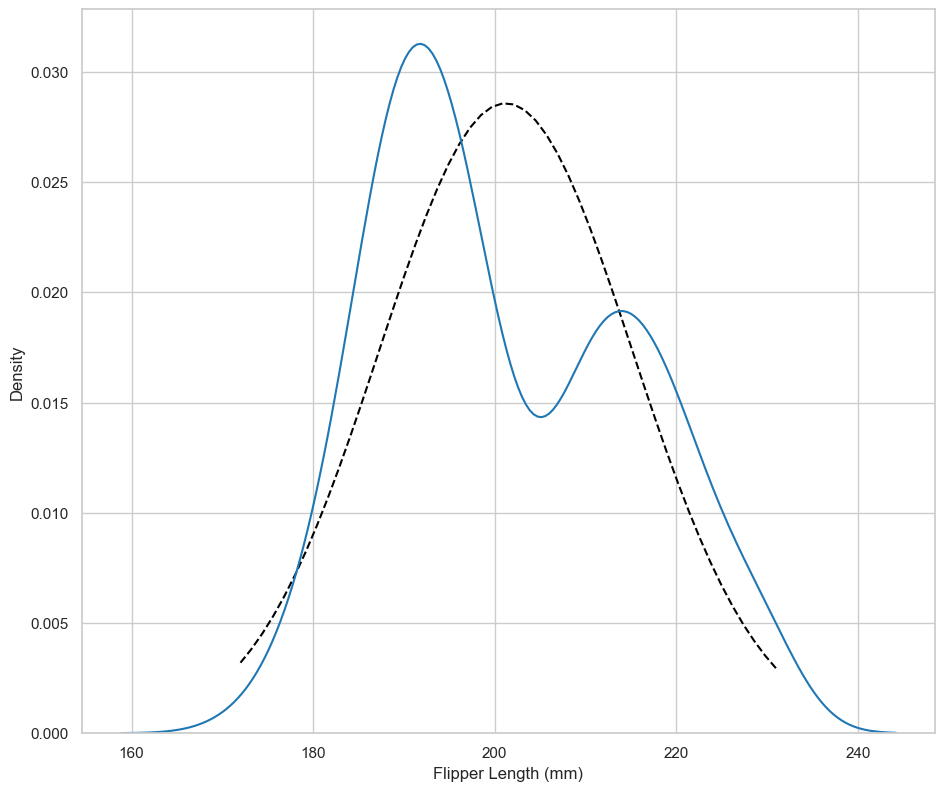

In [58]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys, color = 'black', linestyle = 'dashed' )

sns.kdeplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)'
).plot()

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

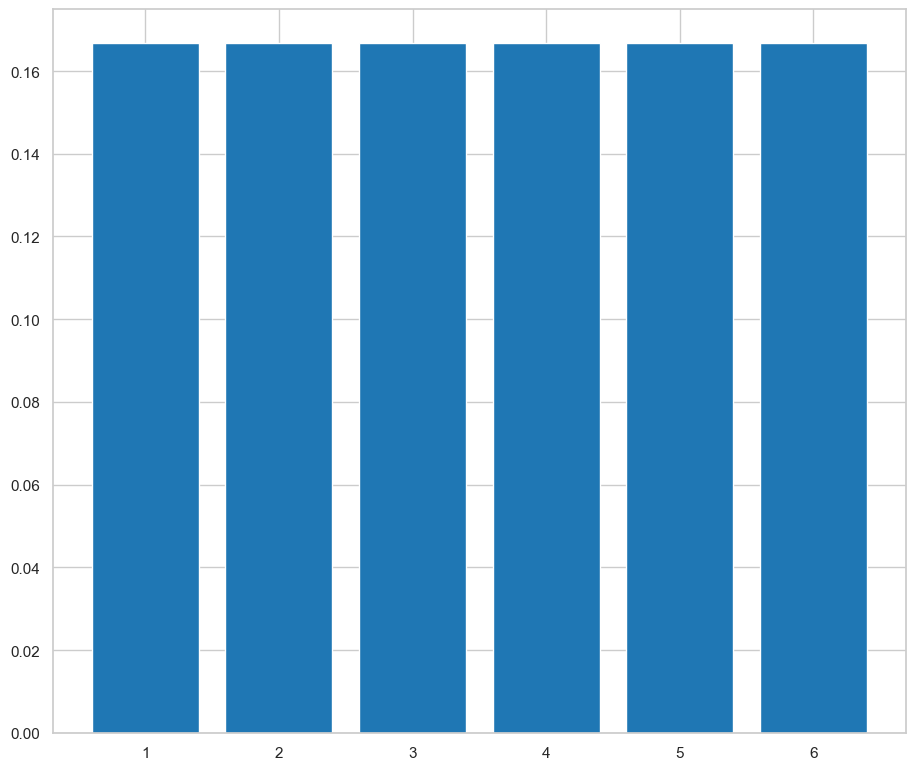

In [59]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

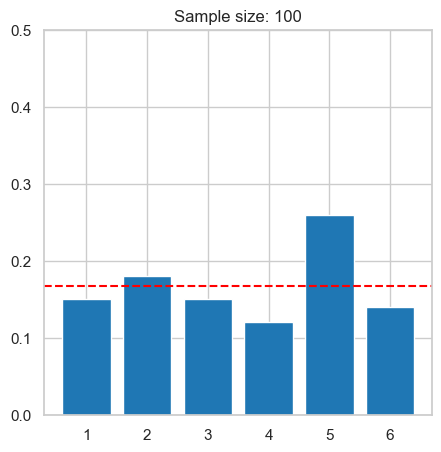

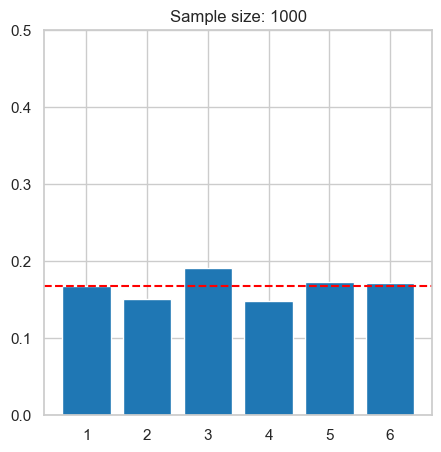

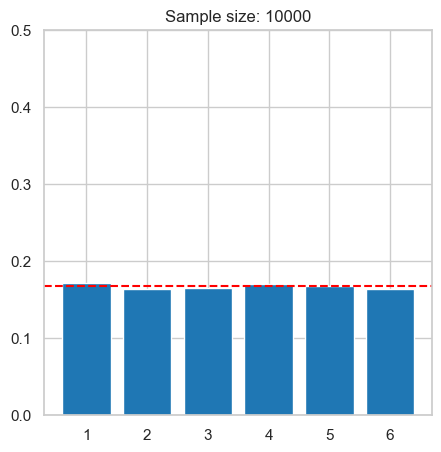

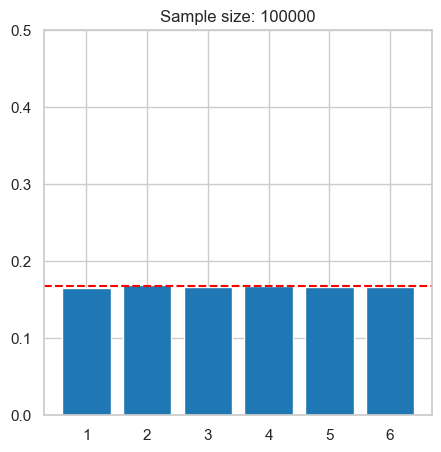

In [60]:
for sample_size in (1e2,1e3,1e4,1e5):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6,color='red',linestyle='dashed')
    plt.ylim([0,0.50])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

In [61]:
preprocess_penguins_df.Sex.value_counts(normalize=True)

FEMALE    0.503086
MALE      0.496914
Name: Sex, dtype: float64

In [62]:
sex_numeric = preprocess_penguins_df['Sex'].replace(['MALE','FEMALE'],[1,0])
sex_numeric

1      0
2      0
4      0
5      1
6      0
      ..
339    1
340    0
341    1
342    1
343    0
Name: Sex, Length: 324, dtype: int64

In [63]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace = True).to_numpy()
    sample_name = f'sample_{i}'
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f'Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%')

Estimated percentage of male penguins in population is: 49.8371%


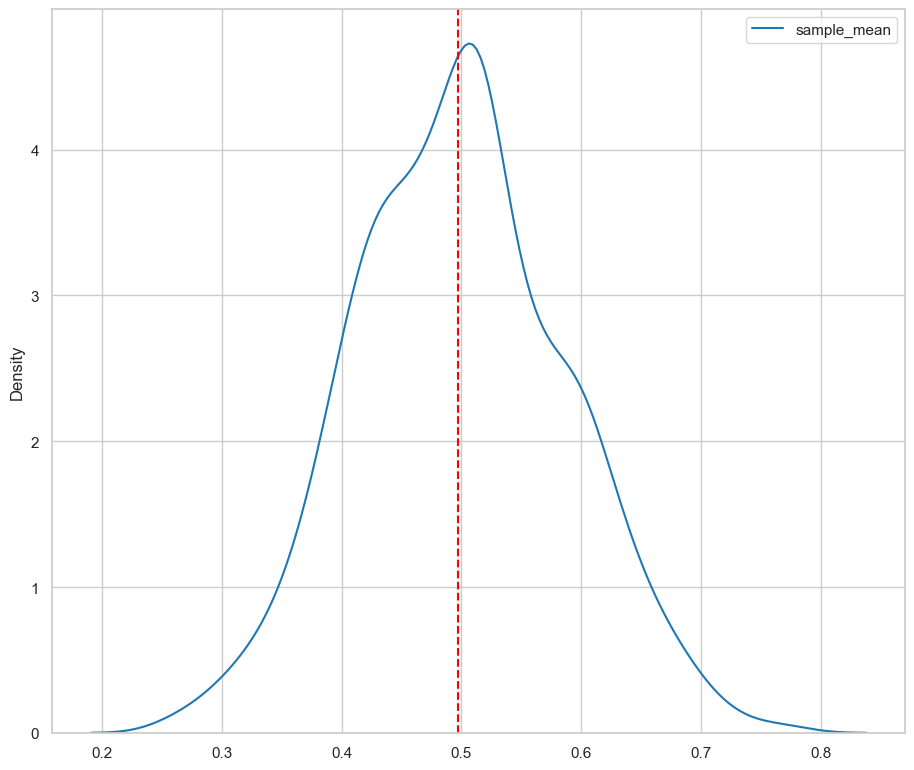

In [64]:
#Funcion de dencidad
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color = 'red', linestyle = 'dashed')

In [65]:
# explorar el efecto de ir incrementado el tamaño de las muestras

sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:,0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

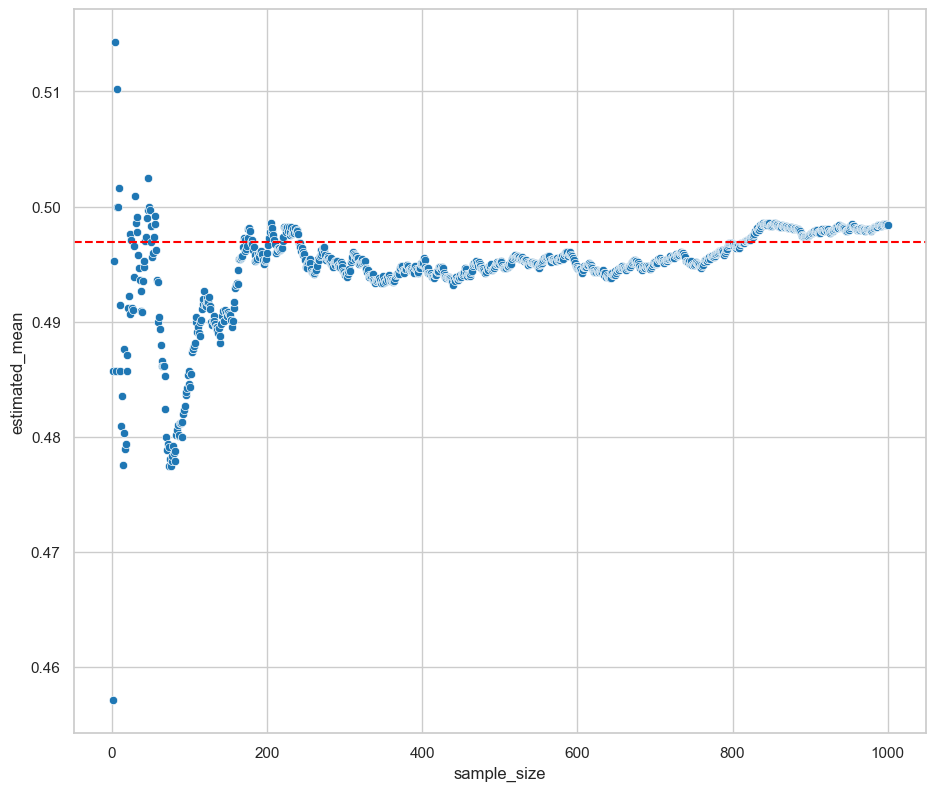

In [66]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle ='dashed'
)

# x tamaño de la muestra, y la media estimada
#pasamaos de binomial a una distribucion normal

#la media de las muestras tiende a una distribucion normal

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

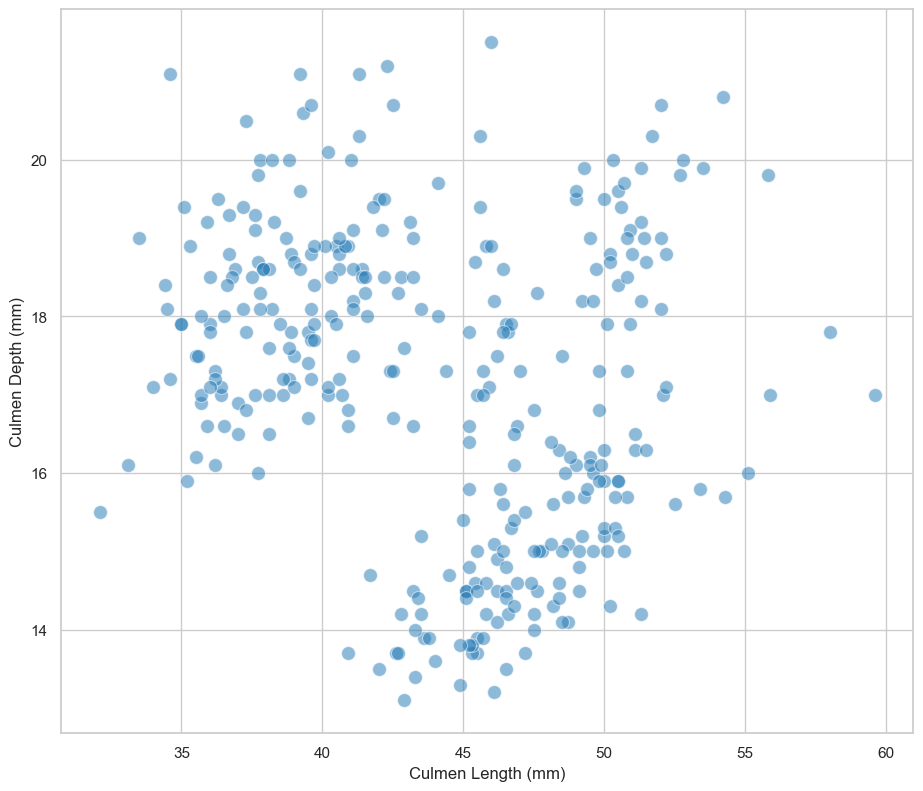

In [67]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    alpha=1/2,
    s=100
)

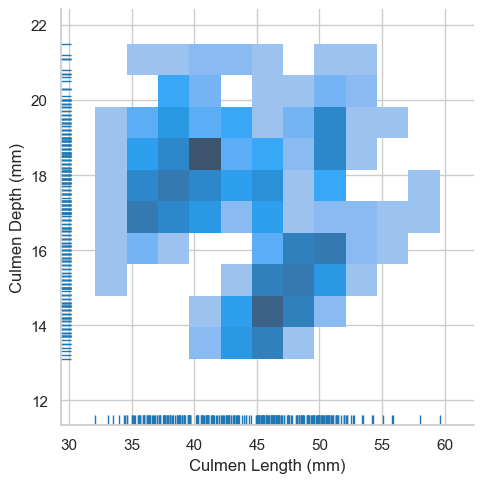

In [68]:
#histograma de frecuencias
sns.displot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    rug=True
)

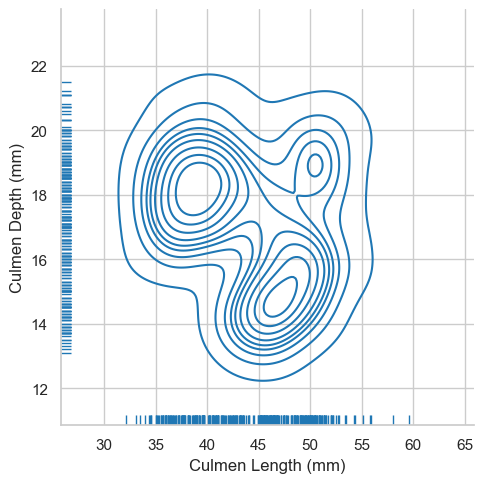

In [69]:
#histograma de frecuencias
sns.displot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    rug=True,
    kind='kde' #dencidades
)

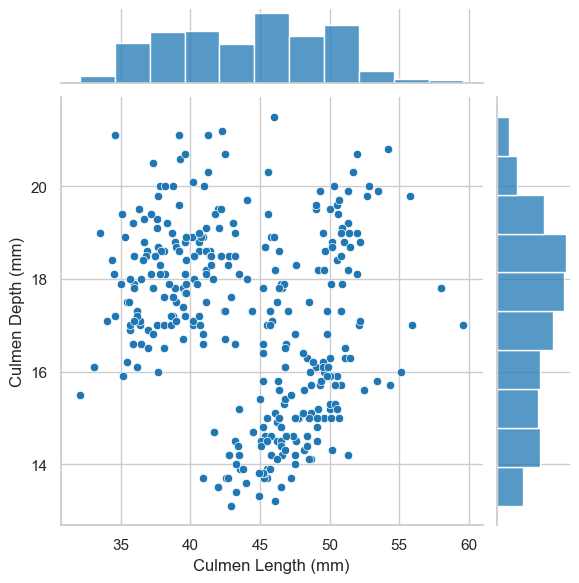

In [70]:
#grafico con dispercion e histograma
sns.jointplot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='Species', ylabel='Culmen Length (mm)'>

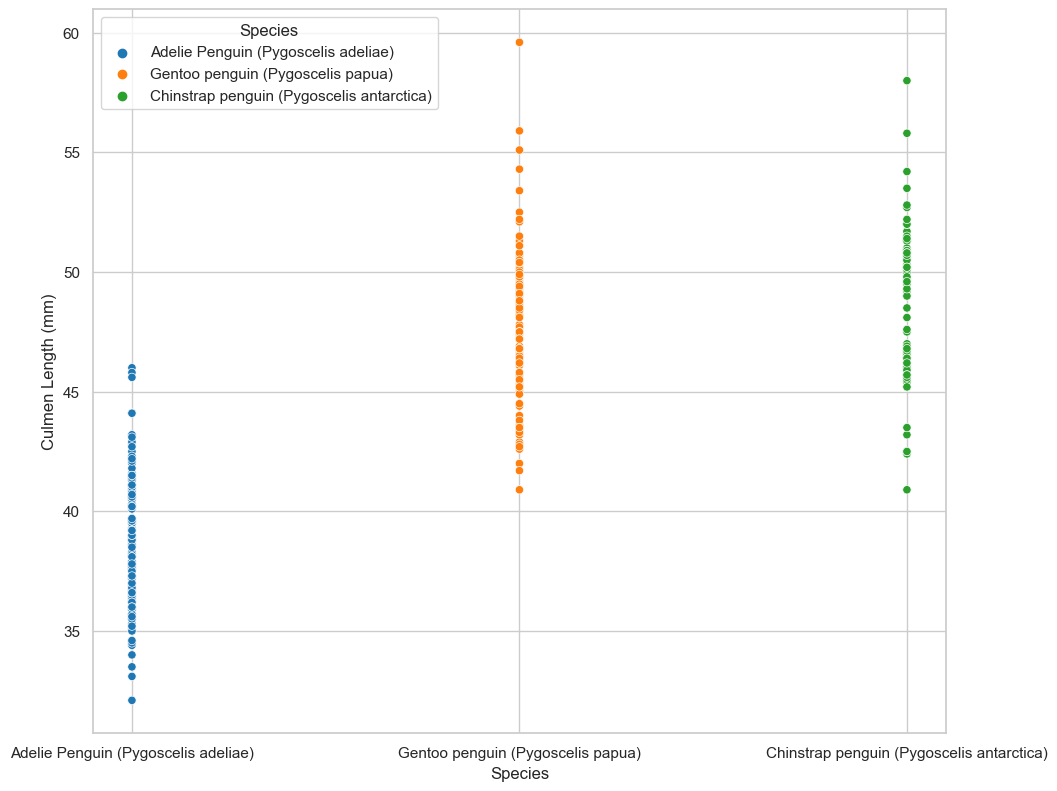

In [71]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='Species',
    y='Culmen Length (mm)',
    hue='Species'
)

<AxesSubplot: xlabel='Species', ylabel='Culmen Length (mm)'>

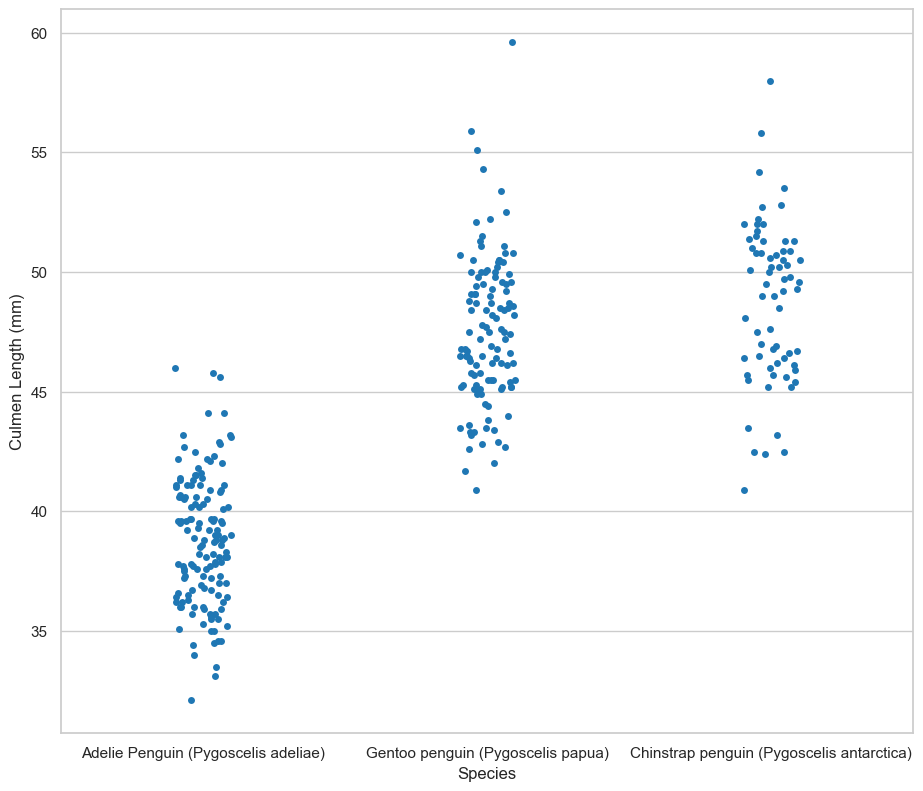

In [72]:
sns.stripplot(
    data=preprocess_penguins_df,
    x='Species',
    y = 'Culmen Length (mm)'
)

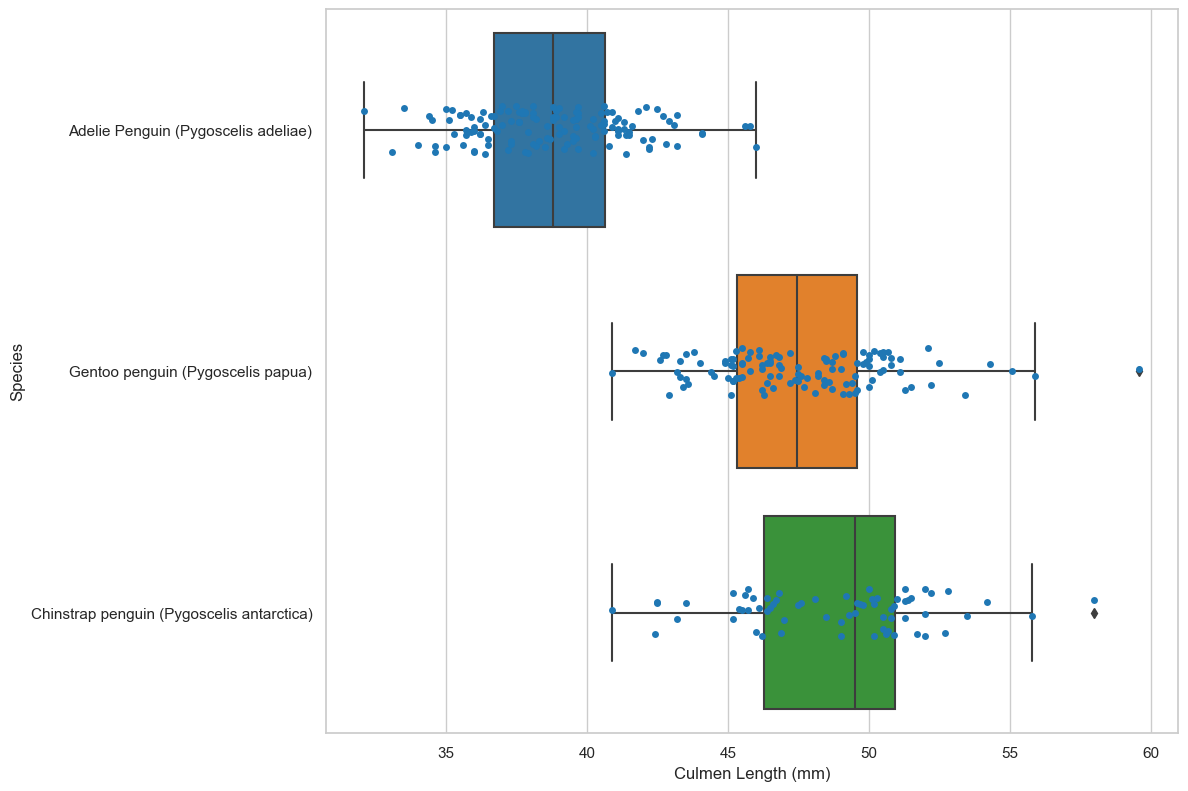

In [73]:
ax= sns.boxplot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Species'
)

ax = sns.stripplot(
    data=preprocess_penguins_df,
    x='Culmen Length (mm)',
    y='Species'
)

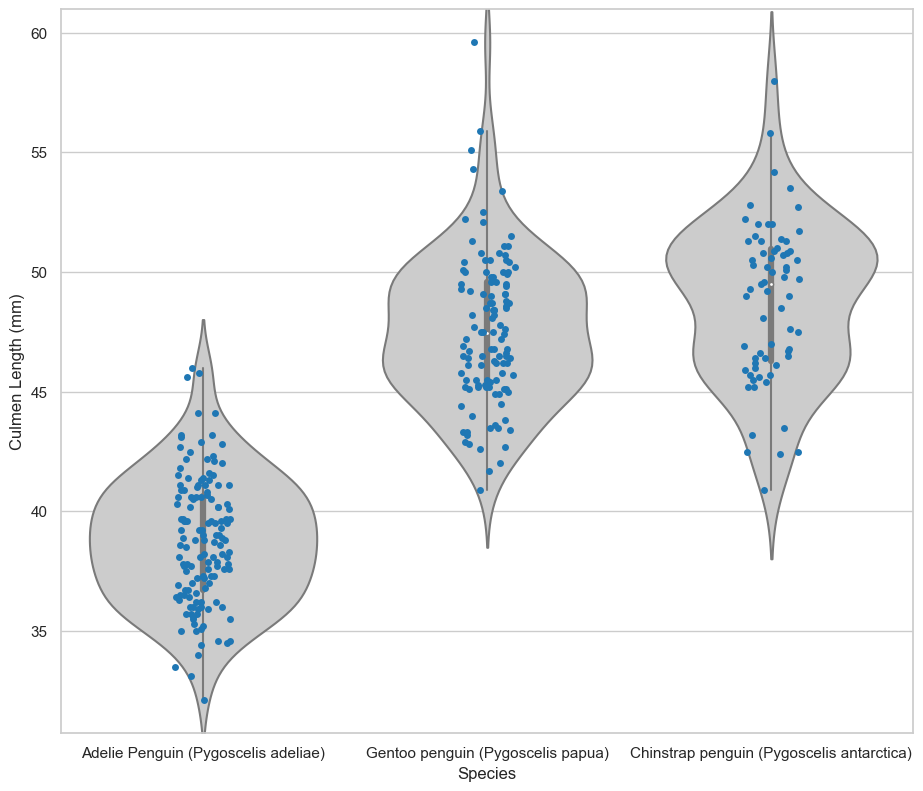

In [74]:
ax = sns.violinplot(
    data=preprocess_penguins_df,
    x='Species',
    y='Culmen Length (mm)',
    color='.8'
)

ax = sns.stripplot(
    data=preprocess_penguins_df,
    x='Species',
    y='Culmen Length (mm)'
)

<AxesSubplot: xlabel='Species', ylabel='Culmen Length (mm)'>

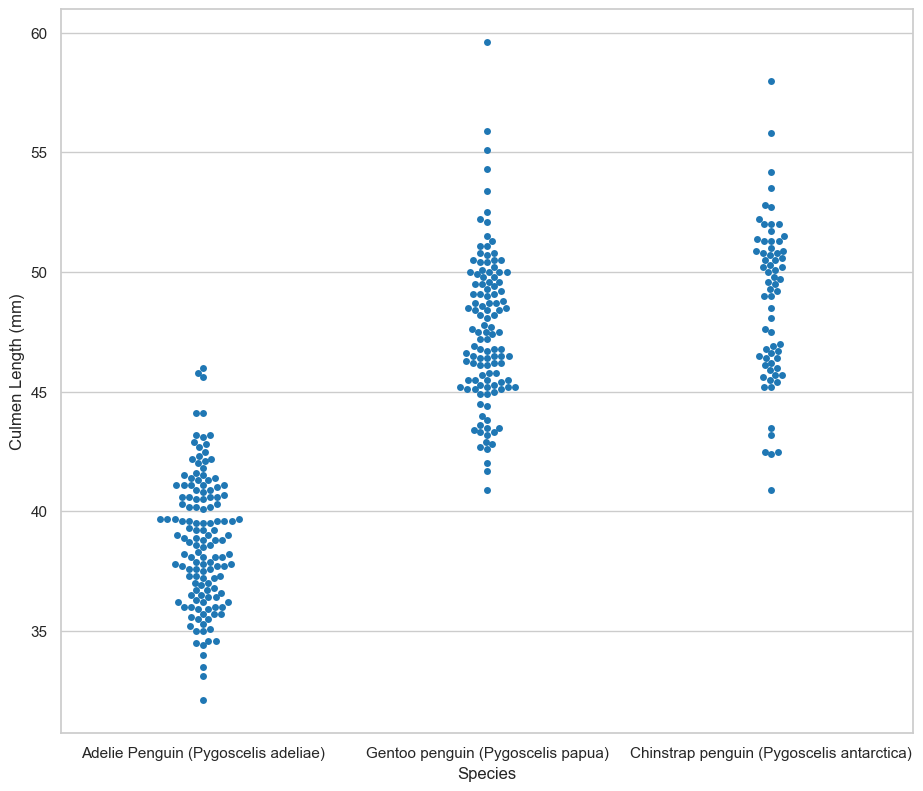

In [75]:
sns.swarmplot(
    data=preprocess_penguins_df,
    x='Species',
    y='Culmen Length (mm)'
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [76]:
preprocess_penguins_df.corr()

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
Sample Number             1.000000           -0.287177           0.006670   
Culmen Length (mm)       -0.287177            1.000000          -0.222923   
Culmen Depth (mm)         0.006670           -0.222923           1.000000   
Flipper Length (mm)       0.000029            0.648947          -0.574924   
Body Mass (g)            -0.035385            0.591724          -0.470177   
Delta 15 N (o/oo)         0.013260           -0.056942           0.599481   
Delta 13 C (o/oo)        -0.490172            0.188517           0.420012   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Sample Number                   0.000029      -0.035385           0.013260   
Culmen Length (mm)              0.648947       0.591724          -0.056942   
Culmen Depth (mm)              -0.574924      -0.470177           0.599481   
Flipper Length (mm)             1.000000       0.877066          -0.501601   
Body Mass (g)                   0.877066       1.000000          -0.539795   
Delta 15 N (o/oo)              -0.501601      -0.539795           1.000000   
Delta 13 C (o/oo)              -0.375570      -0.372041           0.569393   

                     Delta 13 C (o/oo)  
Sample Number                -0.490172  
Culmen Length (mm)            0.188517  
Culmen Depth (mm)             0.420012  
Flipper Length (mm)          -0.375570  
Body Mass (g)                -0.372041  
Delta 15 N (o/oo)             0.569393  
Delta 13 C (o/oo)             1.000000

## ¿Cómo puedo visualizar los coeficientes de correlación?

<AxesSubplot: >

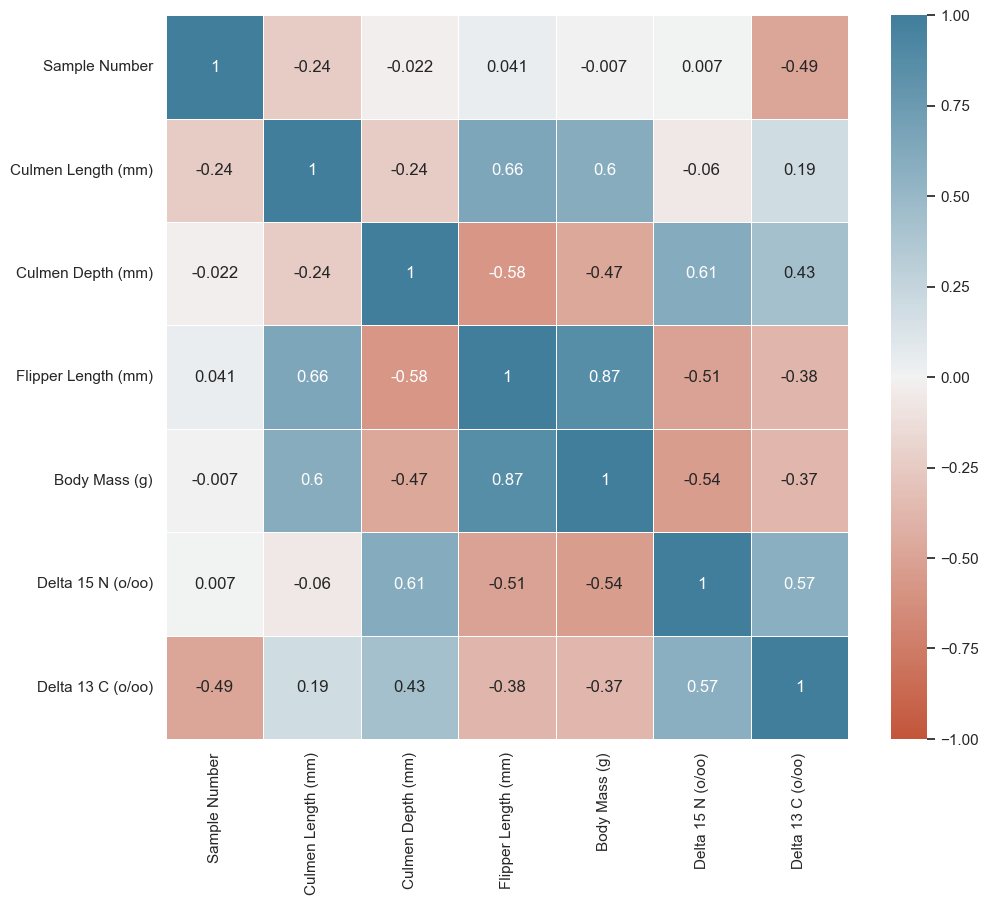

In [77]:
sns.heatmap(
    data=raw_pinguins_df.corr(),
    cmap=sns.diverging_palette(20,230, as_cmap=True), # paleta divergente
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

#la correlacion lineal es positiva, la intencidad con la que brilla cada color representa
#la correlacion que conlleva las variables

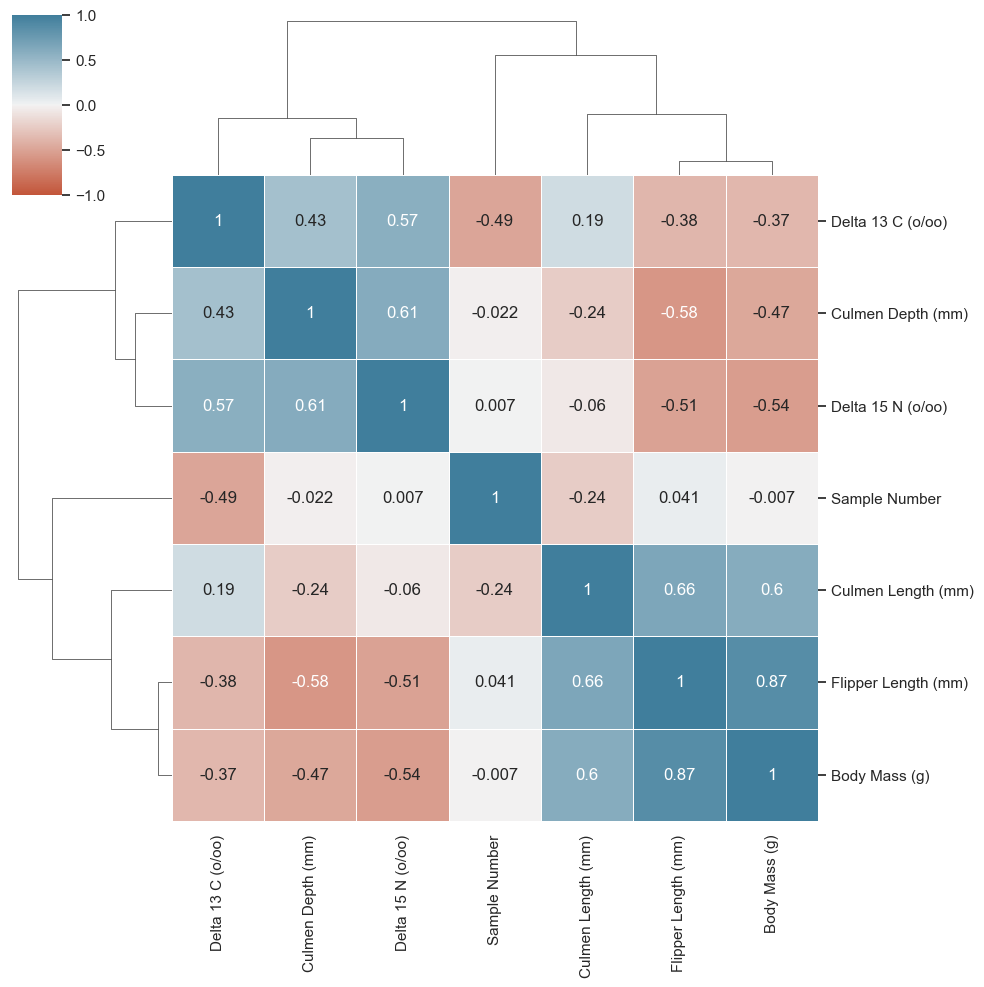

In [78]:
sns.clustermap(
    data=raw_pinguins_df.corr(),
    cmap=sns.diverging_palette(20,230, as_cmap=True), # paleta divergente
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

#Closter map agrupa los dats segun el valor de la matrix

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [79]:
preprocess_penguins_df = (
    preprocess_penguins_df
    .assign(
        numeric_sex = lambda df: df['Sex'].replace(['FEMALE','MALE'],[0,1])
    )
)

preprocess_penguins_df

studyName  Sample Number                                    Species  \
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
5     PAL0708              6        Adelie Penguin (Pygoscelis adeliae)   
6     PAL0708              7        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
5    Anvers  Torgersen  Adult, 1 Egg Stage          N3A2               Yes   
6    Anvers  Torgersen  Adult, 1 Egg Stage          N4A1                No   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
4    2007-11-16                36.7               19.3                193.0   
5    2007-11-16                39.3               20.6                190.0   
6    2007-11-15                38.9               17.8                181.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  numeric_sex  
1           3800.0  FEMALE            8.94956          -24.69454            0  
2           3250.0  FEMALE            8.36821          -25.33302            0  
4           3450.0  FEMALE            8.76651          -25.32426            0  
5           3650.0    MALE            8.66496          -25.29805            1  
6           3625.0  FEMALE            9.18718          -25.21799            0  
..             ...     ...                ...                ...          ...  
339         4000.0    MALE            9.70465          -24.53494            1  
340         3400.0  FEMALE            9.37608          -24.40753            0  
341         3775.0    MALE            9.46180          -24.70615            1  
342         4100.0    MALE            9.98044          -24.68741            1  
343         3775.0  FEMALE            9.39305          -24.25255            0  

[324 rows x 17 columns]

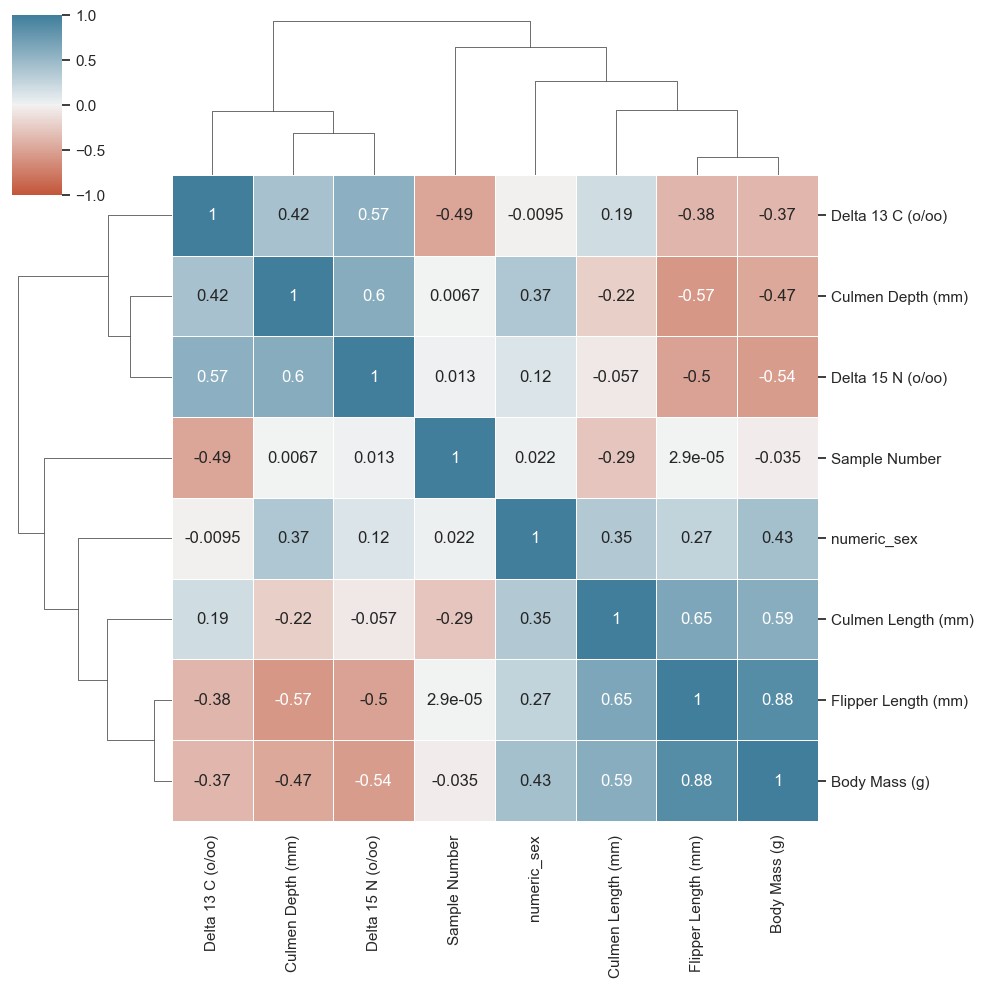

In [80]:
sns.clustermap(
    data=preprocess_penguins_df.corr(),
    cmap=sns.diverging_palette(20,230, as_cmap=True), # paleta divergente
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.05160265],
       [0.05160265, 1.        ]])

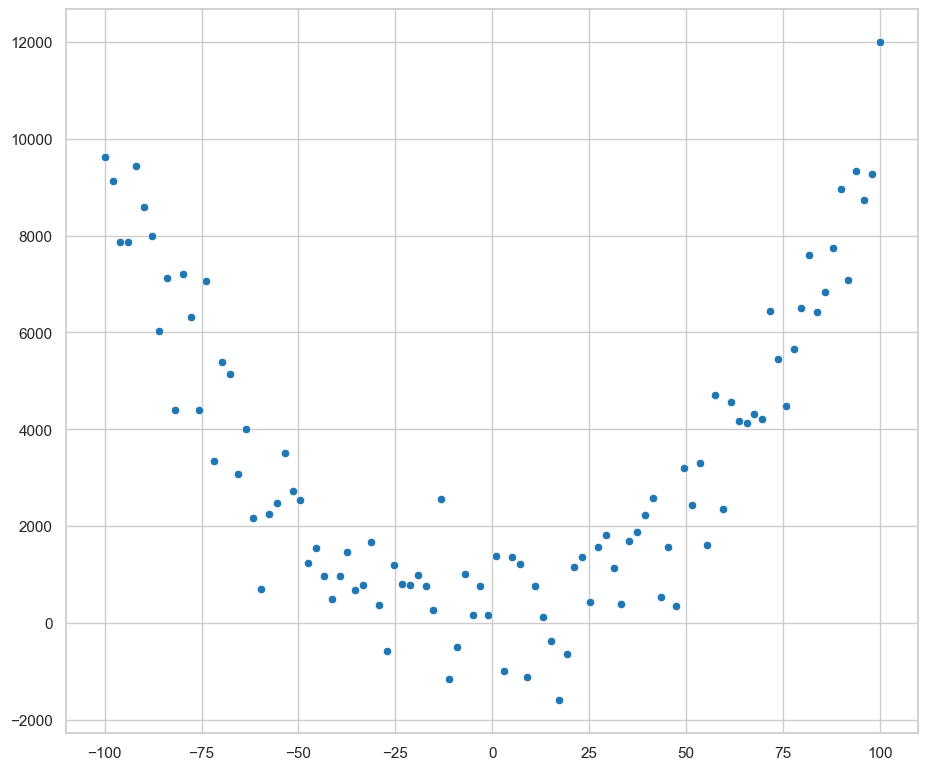

In [81]:
x = np.linspace(-100,100,100)
y = x**2
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x , y=y
)

np.corrcoef(x,y)

array([[1.        , 0.91642169],
       [0.91642169, 1.        ]])

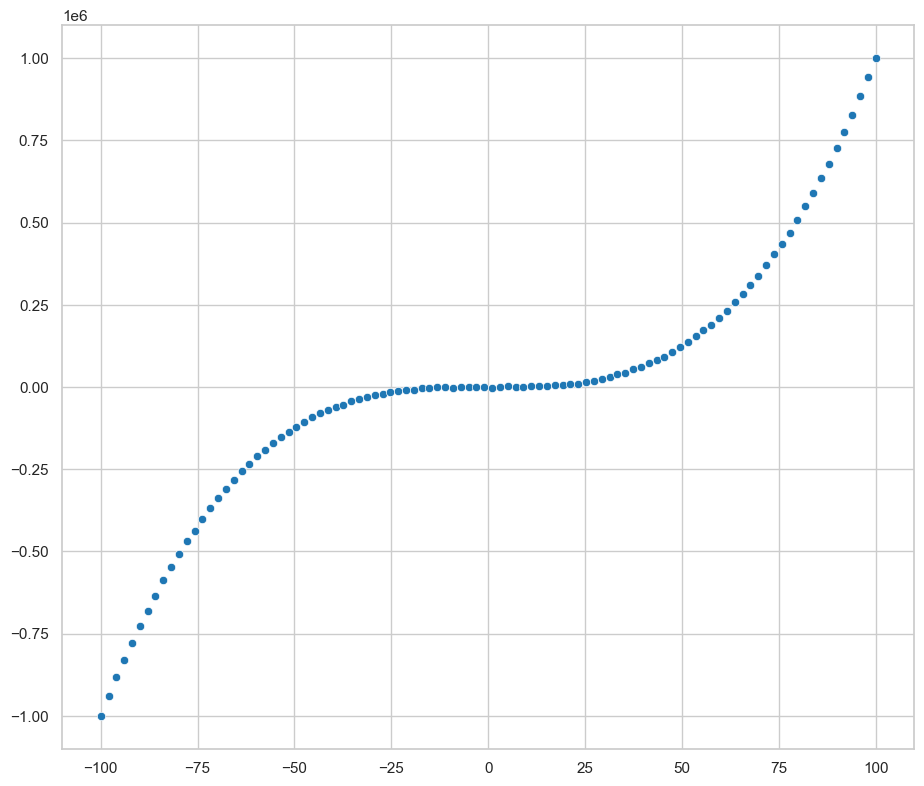

In [82]:
x = np.linspace(-100,100,100)
y = x**3
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x , y=y
)

np.corrcoef(x,y)

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Delta 13 C (o/oo)'>

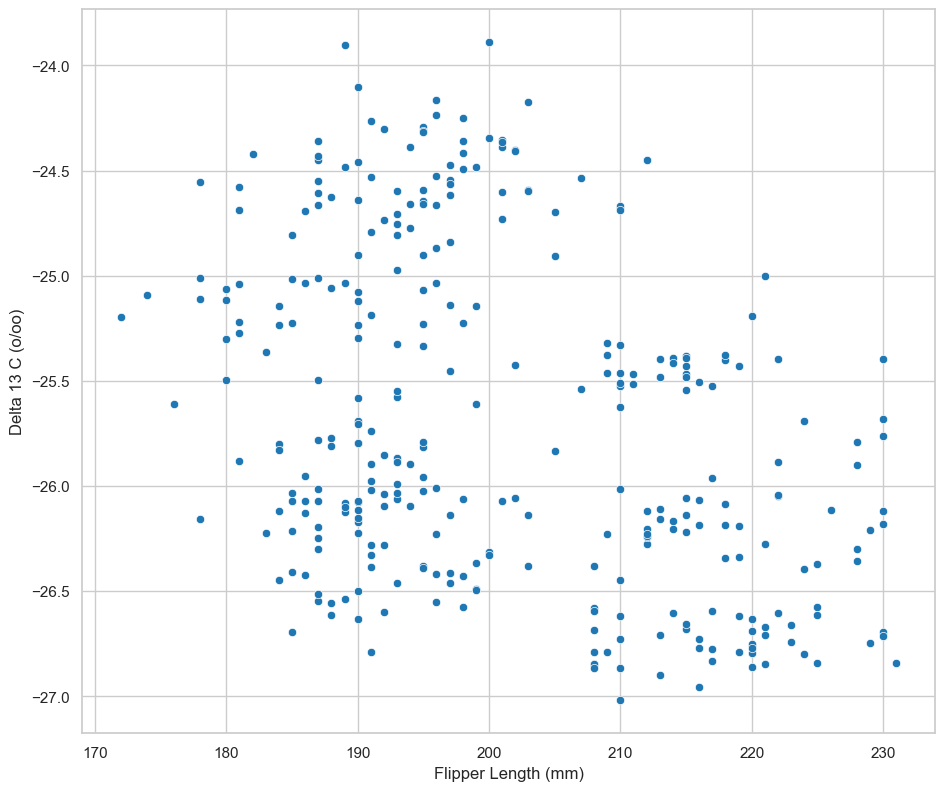

In [83]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y = 'Delta 13 C (o/oo)'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.61607125]
 [0.61607125 1.        ]]


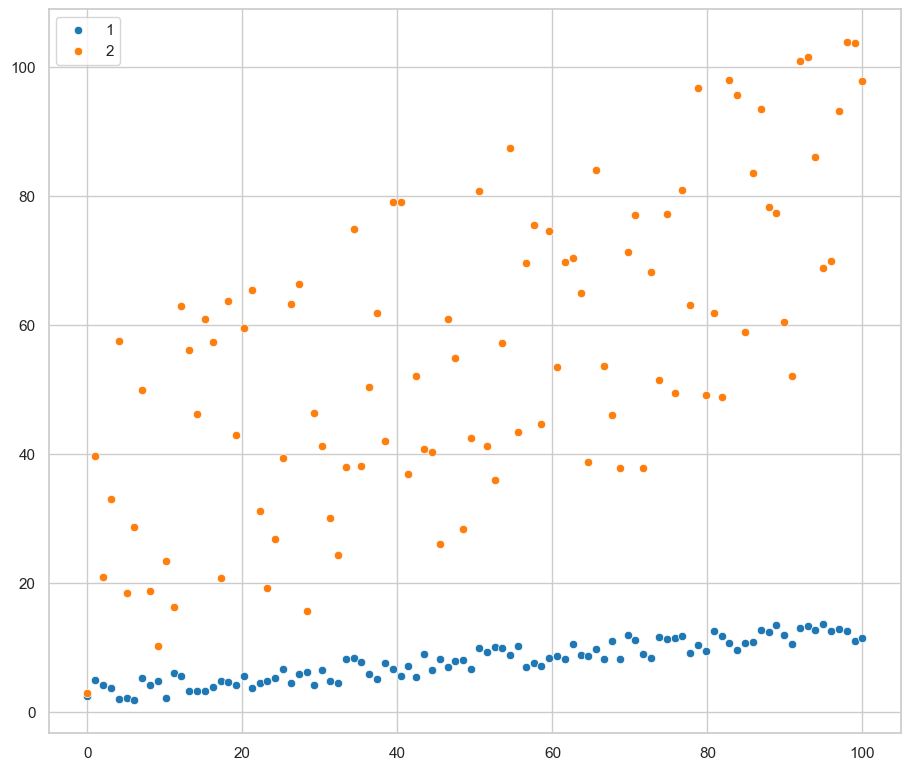

In [84]:
np.random.seed(42)
x_1= np.linspace(0,100,100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2,2,size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2= np.linspace(0,100,100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0,60,size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels = ['1','2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(y_1, y_2))

# Estableciendo relaciones: Análisis de regresión simple

In [85]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1,res_2, sep='\n')

# Slope efecto sobre los datos entre mas menor mas correlacion podrian tener

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


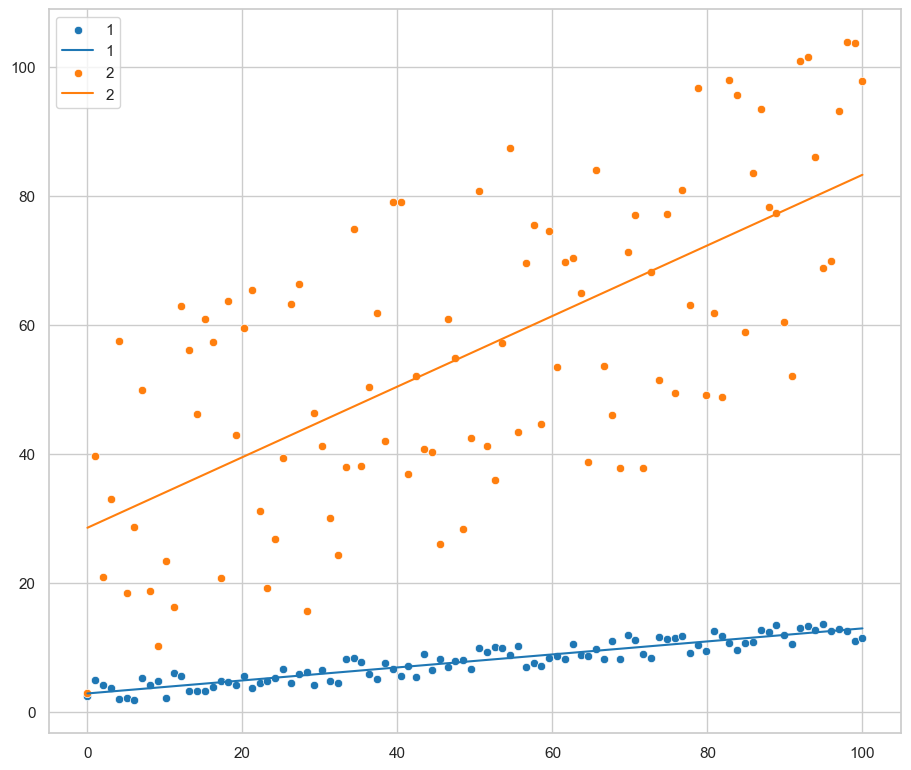

In [86]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1= np.array([x_1.min(),x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1,fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2= np.array([x_2.min(),x_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2,fy_2)

plt.legend(labels=['1','1','2','2'])

LinregressResult(slope=-0.02127821093821264, intercept=-21.40717390769804, rvalue=-0.37556979334502444, pvalue=2.715086049072093e-12, stderr=0.0029261715663948668, intercept_stderr=0.5902033789164496)


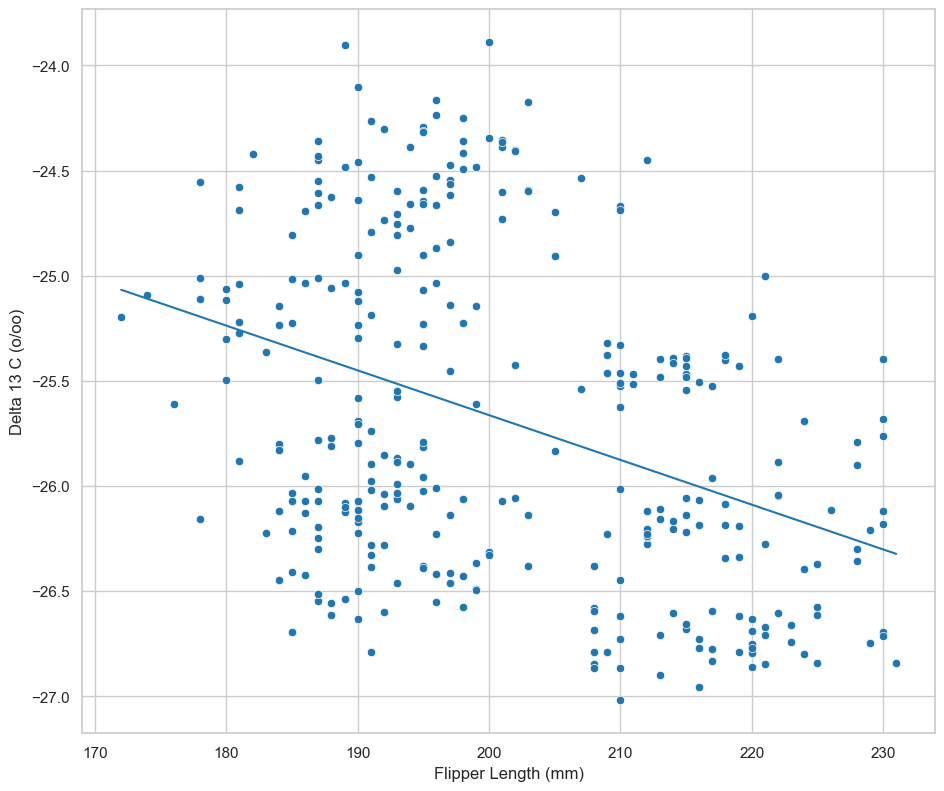

In [87]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y = 'Delta 13 C (o/oo)'
)

res_penguins = scipy.stats.linregress(
    x=preprocess_penguins_df['Flipper Length (mm)'],
    y=preprocess_penguins_df['Delta 13 C (o/oo)']
)
print(res_penguins)

#tenemos una corelacion negativa

fx_1 = np.array([preprocess_penguins_df['Flipper Length (mm)'].min(),preprocess_penguins_df['Flipper Length (mm)'].max()])
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1,fy_1)

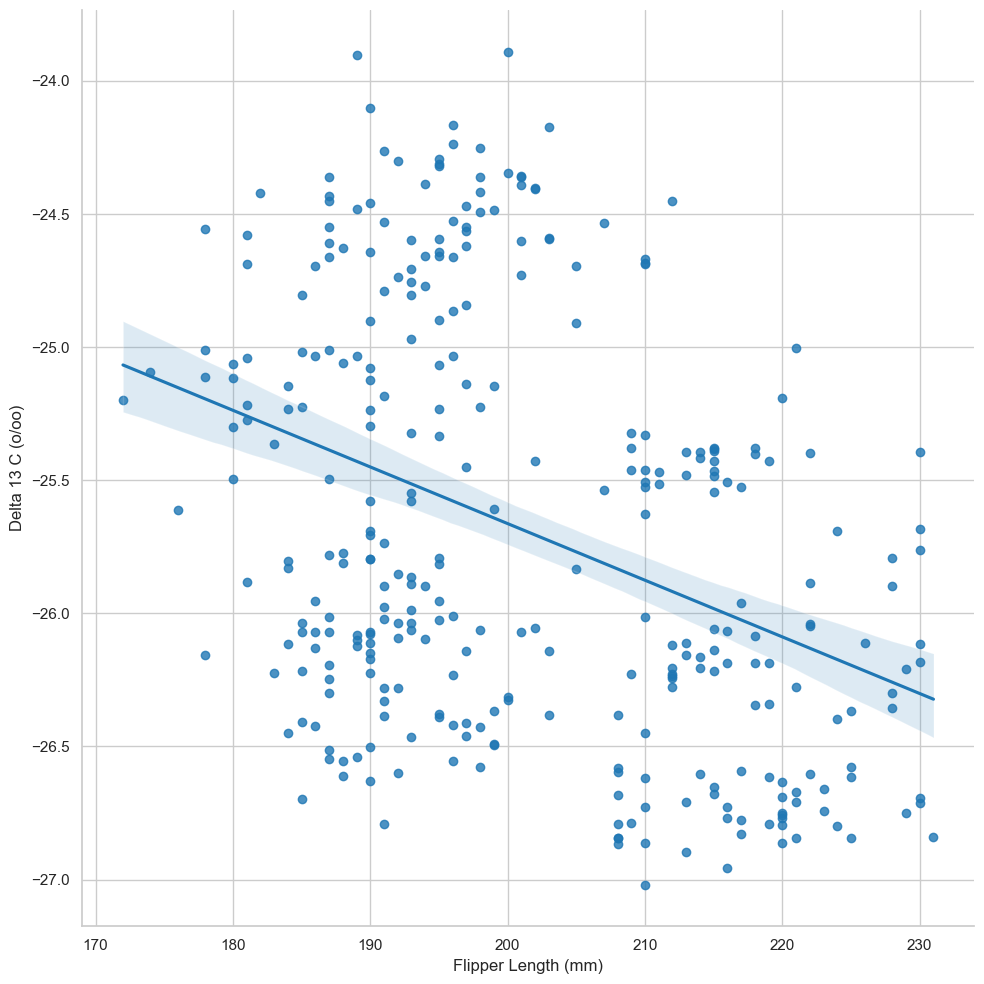

In [88]:
sns.lmplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y = 'Delta 13 C (o/oo)',
    height=10
)

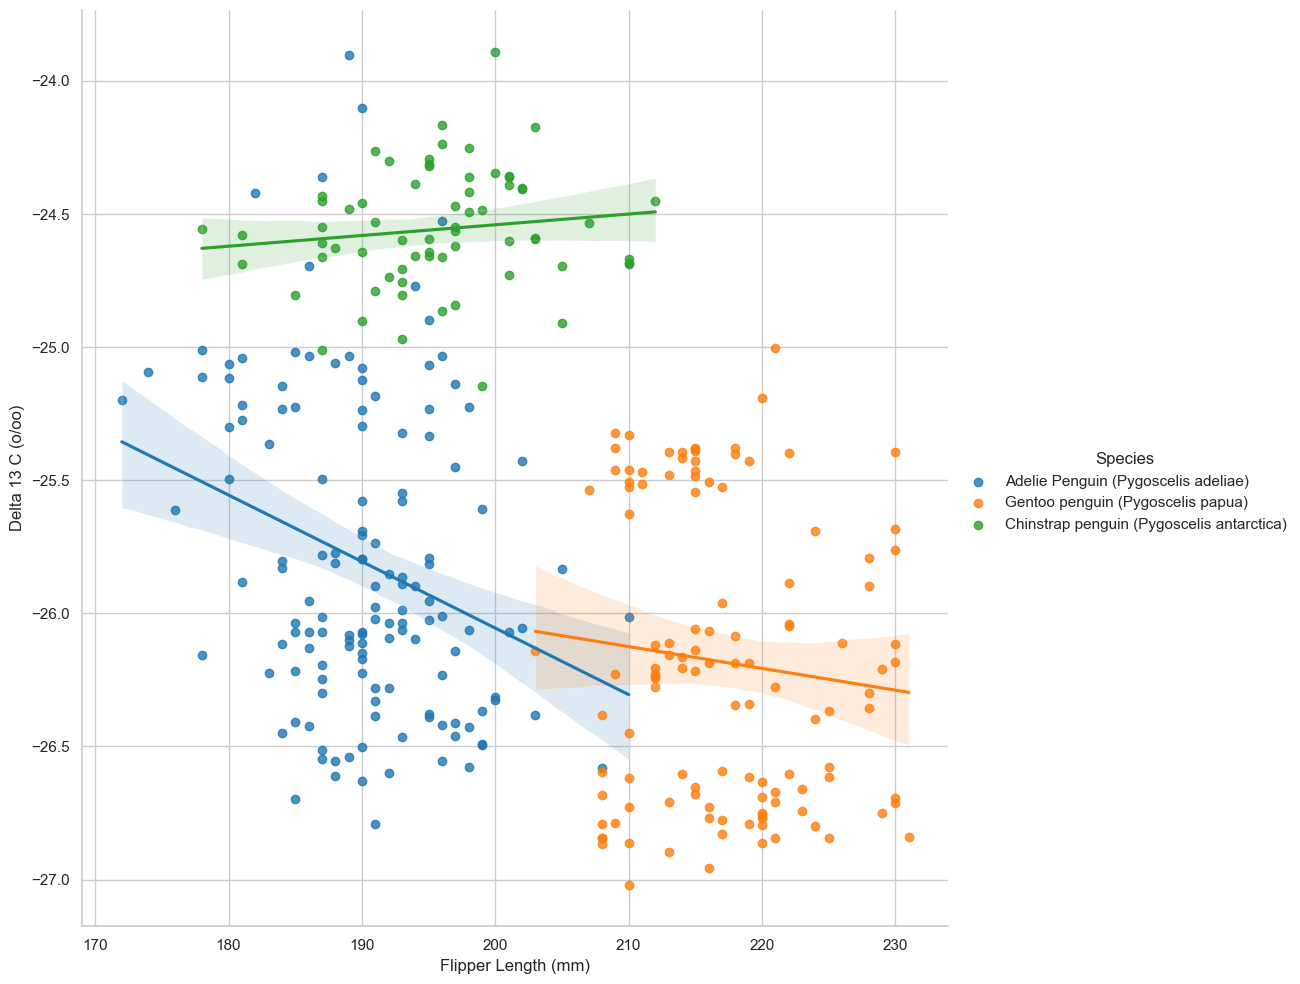

In [89]:
#Ver la misma corelacion por especies
sns.lmplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y='Delta 13 C (o/oo)',
    height=10,
    hue='Species'
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [90]:
x = preprocess_penguins_df['Flipper Length (mm)']
y = preprocess_penguins_df['Delta 13 C (o/oo)']

res_x_y = scipy.stats.linregress(x=x,y=y)
res_y_x = scipy.stats.linregress(x=y,y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.02127821093821264, intercept=-21.40717390769804, rvalue=-0.37556979334502444, pvalue=2.715086049072093e-12, stderr=0.0029261715663948668, intercept_stderr=0.5902033789164496)
LinregressResult(slope=-6.628972242206408, intercept=30.926426817969002, rvalue=-0.37556979334502444, pvalue=2.715086049072093e-12, stderr=0.9116137698743296, intercept_stderr=23.42922527686052)


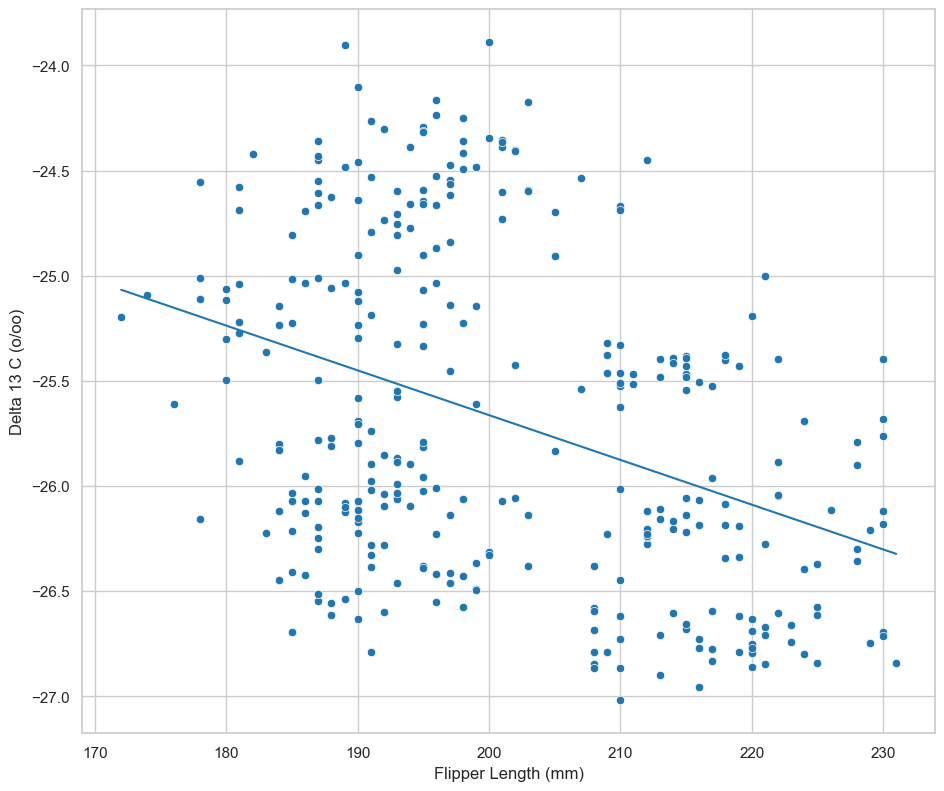

In [91]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(),x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1,fy_1)

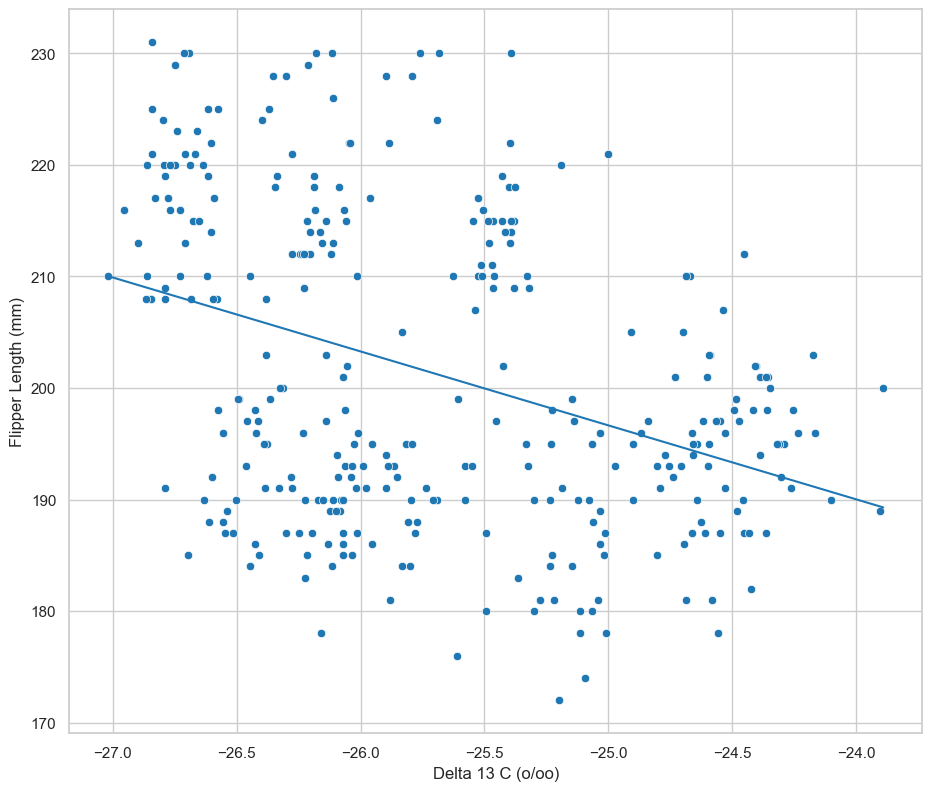

In [92]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(),y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2,fy_2)

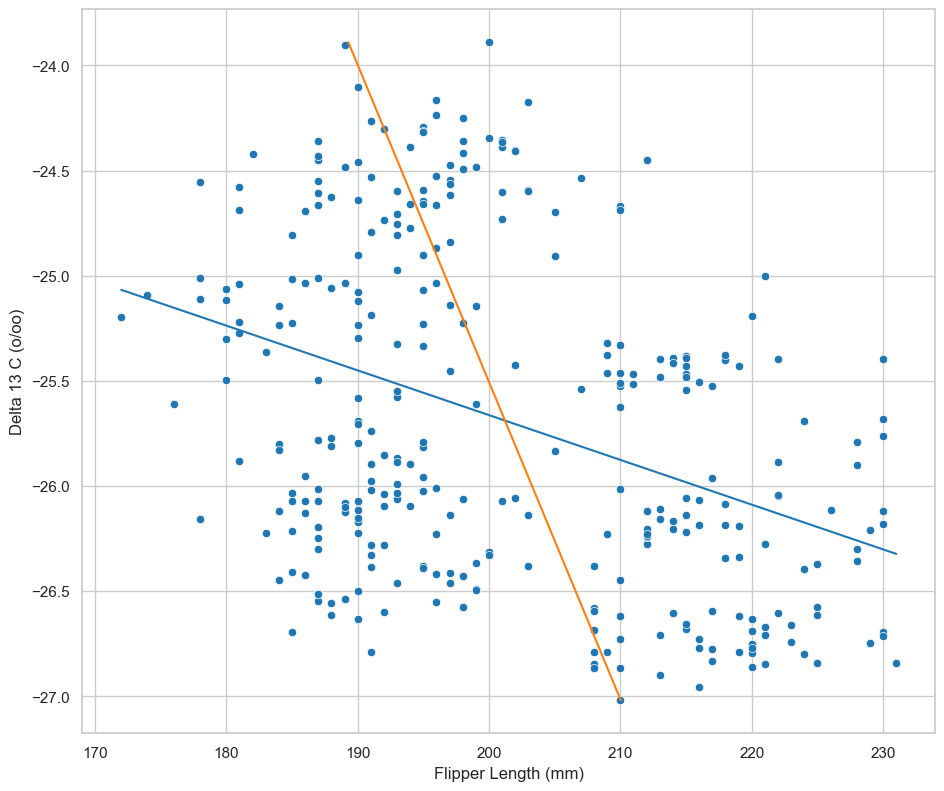

In [93]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [94]:
 
# (
#     smf.ols(
#         preprocess_penguins_df['Flipper Length (mm)'], preprocess_penguins_df['Delta 13 C (o/oo)']
#     ).fit()
# )

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [95]:
data_process_pingins_2 = preprocess_penguins_df
data_process_pingins_2 = data_process_pingins_2.rename(columns={'Flipper Length (mm)':'longitud_aleta',
                                   'Delta 13 C (o/oo)':'delta_13',
                                   'Body Mass (g)': 'masa_corporal'})

# data_process_pingins_2.columns

#asociacion de la aleta con el peso corporal
model_1 = (
    smf.ols(
        formula = 'longitud_aleta ~ masa_corporal',
        data = data_process_pingins_2
    ).fit()
)

#Descripcion del modelo
model_1.summary()

#Variable dependiente longitud de aleta, parametro de la pendiente en la masa corporal 0.0151

# Hay que verificar el R-Squered para ver la presicion del modelo manejado

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         longitud_aleta   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.48e-104
Time:                        17:13:03   Log-Likelihood:                -1075.8
No. Observations:                 324   AIC:                             2156.
Df Residuals:                     322   BIC:                             2163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       137.4675      1.981     69.386      0.000     133.570     141.365
masa_corporal     0.0151      0.000     32.763      0.000       0.014       0.016
==============================================================================
Omnibus:                       10.890   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.994
Skew:                          -0.420   Prob(JB):                      0.00410
Kurtosis:                       2.669   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 2

In [96]:
#asociacion de la aleta con el peso corporal y el delta 13
model_2 = (
    smf.ols(
        formula = 'longitud_aleta ~ masa_corporal + delta_13',
        data = data_process_pingins_2
    ).fit()
)

#Descripcion del modelo
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         longitud_aleta   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     543.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.50e-104
Time:                        17:13:03   Log-Likelihood:                -1073.8
No. Observations:                 324   AIC:                             2154.
Df Residuals:                     321   BIC:                             2165.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       113.0875     12.398      9.121      0.000      88.695     137.480
masa_corporal     0.0148      0.000     29.810      0.000       0.014       0.016
delta_13         -1.0092      0.507     -1.992      0.047      -2.006      -0.012
==============================================================================
Omnibus:                        9.829   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.886
Skew:                          -0.397   Prob(JB):                      0.00713
Kurtosis:                       2.679   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 3

In [97]:
#asociacion de la aleta con el peso corporal y el delta 13

#Para incluir varaibles categoricas añadimos una C
model_3 = (
    smf.ols(
        formula = 'longitud_aleta ~ masa_corporal + delta_13 + C(Sex)',
        data = data_process_pingins_2
    ).fit()
)

#Descripcion del modelo
model_3.summary()


#Podemos modelar varias variables en una sola

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         longitud_aleta   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.06e-106
Time:                        17:13:03   Log-Likelihood:                -1063.7
No. Observations:                 324   AIC:                             2135.
Df Residuals:                     320   BIC:                             2151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        120.6607     12.152      9.929      0.000      96.752     144.569
C(Sex)[T.MALE]    -3.6861      0.813     -4.535      0.000      -5.285      -2.087
masa_corporal      0.0159      0.001     29.335      0.000       0.015       0.017
delta_13          -0.5998      0.500     -1.199      0.231      -1.584       0.384
==============================================================================
Omnibus:                        5.739   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.324
Skew:                          -0.257   Prob(JB):                       0.0698
Kurtosis:                       2.639   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [98]:
model_4 = (
    smf.ols(
        formula = 'longitud_aleta ~ masa_corporal + C(Sex)',
        data = data_process_pingins_2
    ).fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         longitud_aleta   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     585.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.95e-108
Time:                        17:13:03   Log-Likelihood:                -1064.4
No. Observations:                 324   AIC:                             2135.
Df Residuals:                     321   BIC:                             2146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        135.0398      1.981     68.173      0.000     131.143     138.937
C(Sex)[T.MALE]    -3.8621      0.800     -4.828      0.000      -5.436      -2.288
masa_corporal      0.0162      0.000     32.644      0.000       0.015       0.017
==============================================================================
Omnibus:                        6.484   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.064
Skew:                          -0.281   Prob(JB):                       0.0482
Kurtosis:                       2.636   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [99]:
model_results = pd.DataFrame(
    dict(
        actual_value = data_process_pingins_2['longitud_aleta'],
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),

        #variables que pueden afectar el resultado
        species = data_process_pingins_2['Species'],
        sex = data_process_pingins_2['Sex']
    )
)

model_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
1           186.0          194.953603          194.102156          195.871692   
2           195.0          186.633246          186.627991          187.512751   
4           193.0          189.658831          189.571349          190.686375   
5           190.0          192.684415          192.497096          190.163391   
6           181.0          192.306217          192.047271          193.404150   
..            ...                 ...                 ...                 ...   
339         207.0          197.979188          196.893280          195.268698   
340         202.0          188.902434          187.908095          189.341781   
341         193.0          194.575405          193.744849          191.795156   
342         210.0          199.491980          198.523259          196.949592   
343         198.0          194.575405          193.287056          195.209217   

     prediction_model_4                                    species     sex  
1            196.445705        Adelie Penguin (Pygoscelis adeliae)  FEMALE  
2            187.558004        Adelie Penguin (Pygoscelis adeliae)  FEMALE  
4            190.789895        Adelie Penguin (Pygoscelis adeliae)  FEMALE  
5            190.159701        Adelie Penguin (Pygoscelis adeliae)    MALE  
6            193.617800        Adelie Penguin (Pygoscelis adeliae)  FEMALE  
..                  ...                                        ...     ...  
339          195.815512  Chinstrap penguin (Pygoscelis antarctica)    MALE  
340          189.981922  Chinstrap penguin (Pygoscelis antarctica)  FEMALE  
341          192.179634  Chinstrap penguin (Pygoscelis antarctica)    MALE  
342          197.431457  Chinstrap penguin (Pygoscelis antarctica)    MALE  
343          196.041719  Chinstrap penguin (Pygoscelis antarctica)  FEMALE  

[324 rows x 7 columns]

#### ECDFs

<AxesSubplot: ylabel='Proportion'>

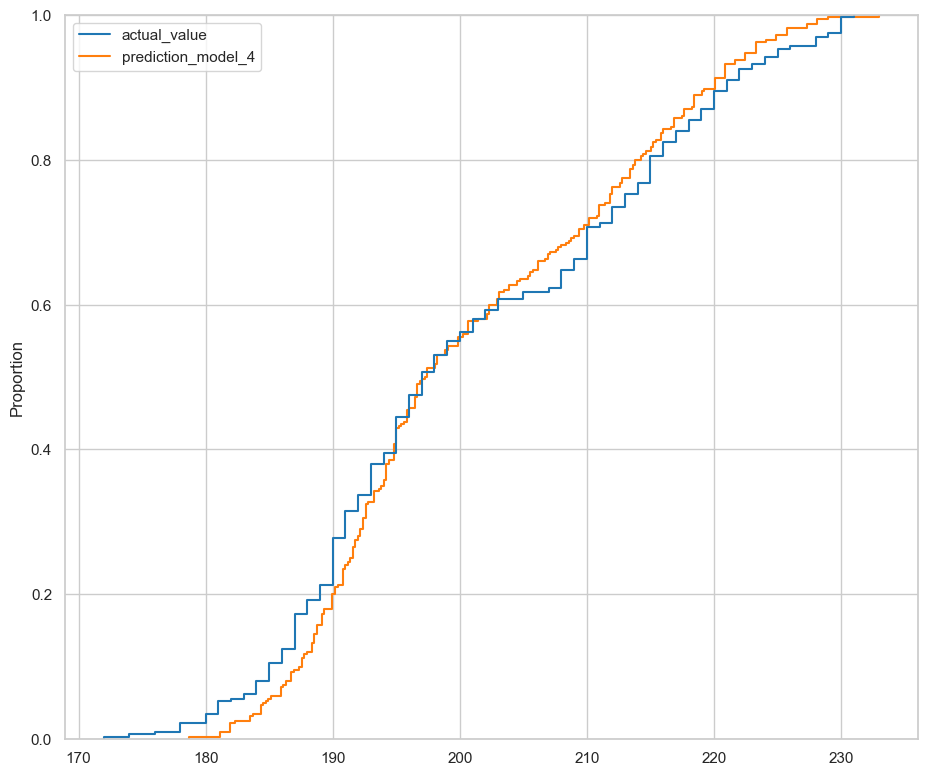

In [100]:
sns.ecdfplot(
    data = model_results.select_columns(['actual_value','prediction_model_4'])
)

#### PDFs

<AxesSubplot: ylabel='Density'>

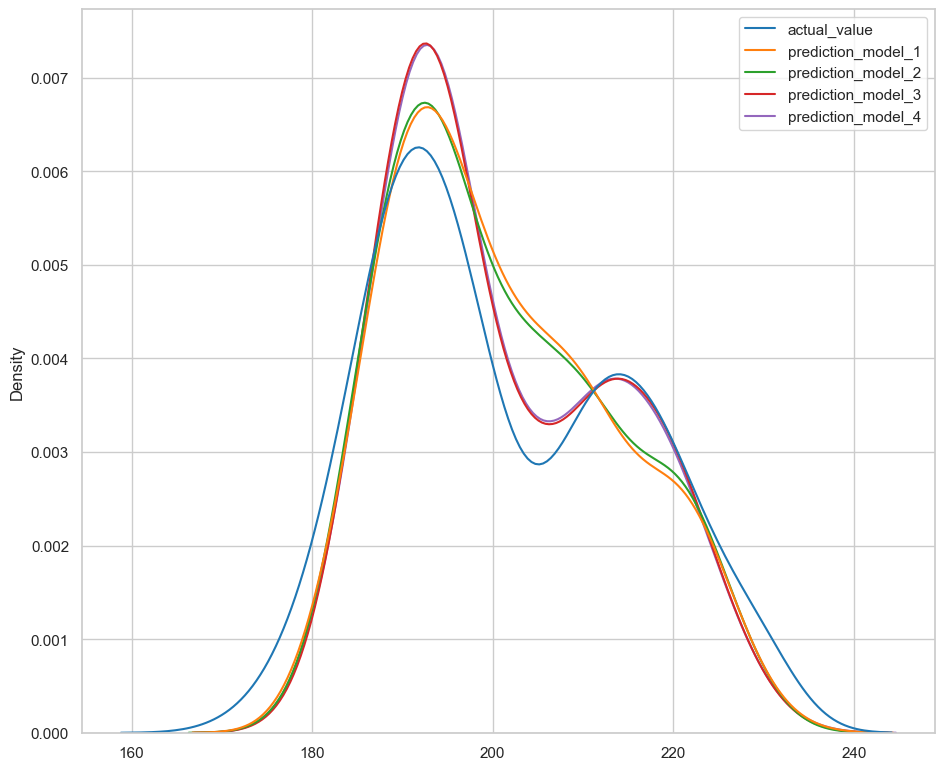

In [101]:
sns.kdeplot(
    data = model_results#,
    #cumulative=True
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

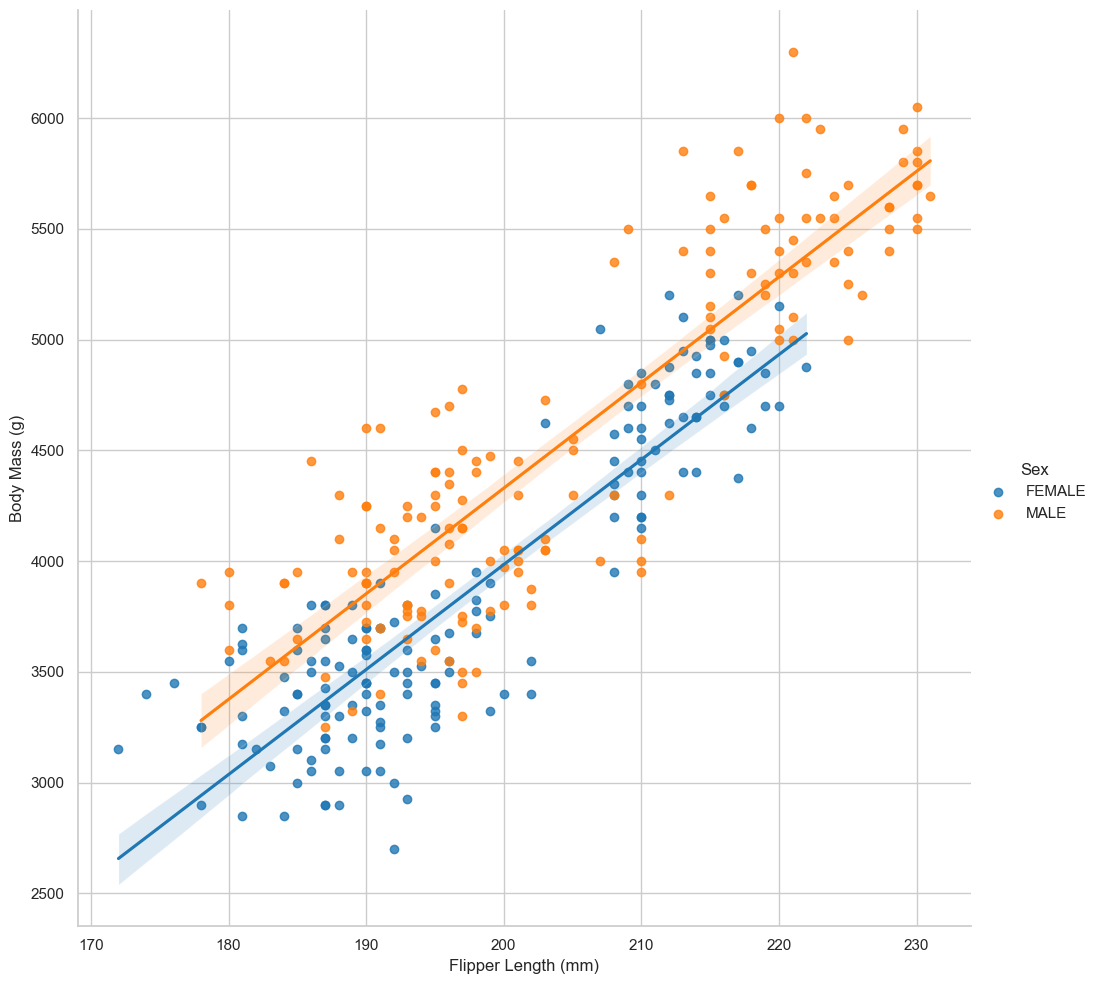

In [102]:
sns.lmplot(
    data= preprocess_penguins_df,
    x = 'Flipper Length (mm)',
    y = 'Body Mass (g)',
    hue ='Sex',
    height= 10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [103]:
data_process_pingins_2 = preprocess_penguins_df
data_process_pingins_2 = data_process_pingins_2.rename(columns={'Flipper Length (mm)':'longitud_aleta',
                                   'Delta 13 C (o/oo)':'delta_13',
                                   'Body Mass (g)': 'masa_corporal'})


smf.logit(
    formula = 'numeric_sex ~ longitud_aleta + delta_13 + masa_corporal +C(Island)',
    data=data_process_pingins_2
).fit().summary()

# La regrecion logistica, son los ratios de probabilidad, si es negativo es algo que es menos probable que
# suceda y si es positivo es mas probable es que suceda



Optimization terminated successfully.
         Current function value: 0.490544
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  324
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.2923
Time:                        17:13:05   Log-Likelihood:                -158.94
converged:                       True   LL-Null:                       -224.57
Covariance Type:            nonrobust   LLR p-value:                 1.277e-26
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.1435      6.342      0.653      0.514      -8.286      16.573
C(Island)[T.Dream]         2.3600      0.487      4.846      0.000       1.405       3.315
C(Island)[T.Torgersen]     2.3630      0.549      4.307      0.000       1.288       3.438
longitud_aleta            -0.0922      0.023     -4.087      0.000      -0.136      -0.048
delta_13                   0.1446      0.218      0.664      0.507      -0.282       0.572
masa_corporal              0.0040      0.001      7.824      0.000       0.003       0.005
==========================================================================================
"""

In [104]:
# Cual es la probabilidad de que hayan pingunos macho en las islas

2.36 - 2.363

-0.0030000000000001137

## Exploración de nuestras variables categóricas

In [105]:
(
    preprocess_penguins_df
    .value_counts(['Island','Sex'])
    .reset_index(name = 'count')
)

Island     Sex  count
0     Biscoe    MALE     82
1     Biscoe  FEMALE     80
2      Dream  FEMALE     61
3      Dream    MALE     58
4  Torgersen  FEMALE     22
5  Torgersen    MALE     21

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [106]:
data_process_pingins_2 = preprocess_penguins_df
data_process_pingins_2 = data_process_pingins_2.rename(columns={'Flipper Length (mm)':'longitud_aleta',
                                   'Delta 13 C (o/oo)':'delta_13',
                                   'Body Mass (g)': 'masa_corporal'})

data_process_pingins_2['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [107]:
data_process_pingins_2 = (
    data_process_pingins_2
    .assign(is_adelie = lambda df : df['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)',
    'Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)'],[1,0,0]))
)

In [108]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ longitud_aleta + C(Sex)',
    data = data_process_pingins_2
).fit()

model_is_adelie.params

# Es mas probable que un pinguno Adeline sea macho a que sea hembra + (Algo es mas probable)

Optimization terminated successfully.
         Current function value: 0.361816
         Iterations 8


Intercept         39.773611
C(Sex)[T.MALE]     1.253496
longitud_aleta    -0.205628
dtype: float64

In [109]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = data_process_pingins_2['is_adelie'],
        predictec_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

actual_adelie  predictec_values
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
6                1               1.0
..             ...               ...
339              0               0.0
340              0               0.0
341              0               1.0
342              0               0.0
343              0               0.0

[324 rows x 2 columns]

In [110]:
# Vizualizar probabilidades

(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predictec_values'])
    .reset_index(name = 'count')
)

actual_adelie  predictec_values  count
0              0               0.0    149
1              1               1.0    122
2              0               1.0     36
3              1               0.0     17

In [111]:
# Matriz de confunsion

print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions['actual_adelie'],
        is_adelie_df_predictions['predictec_values']
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions['actual_adelie'],
    is_adelie_df_predictions['predictec_values']
)

#esta matriz se traduce en 

#149 pinguinos machos pero 36 que fueron hembras
#122 pingunos hembras pero 17 que fueron machos

# Acuracy del 0.83 el modelo predijo la mayor parte de una manera apropiada

[[149  36]
 [ 17 122]]


0.8364197530864198

# Paradoja de Simpson

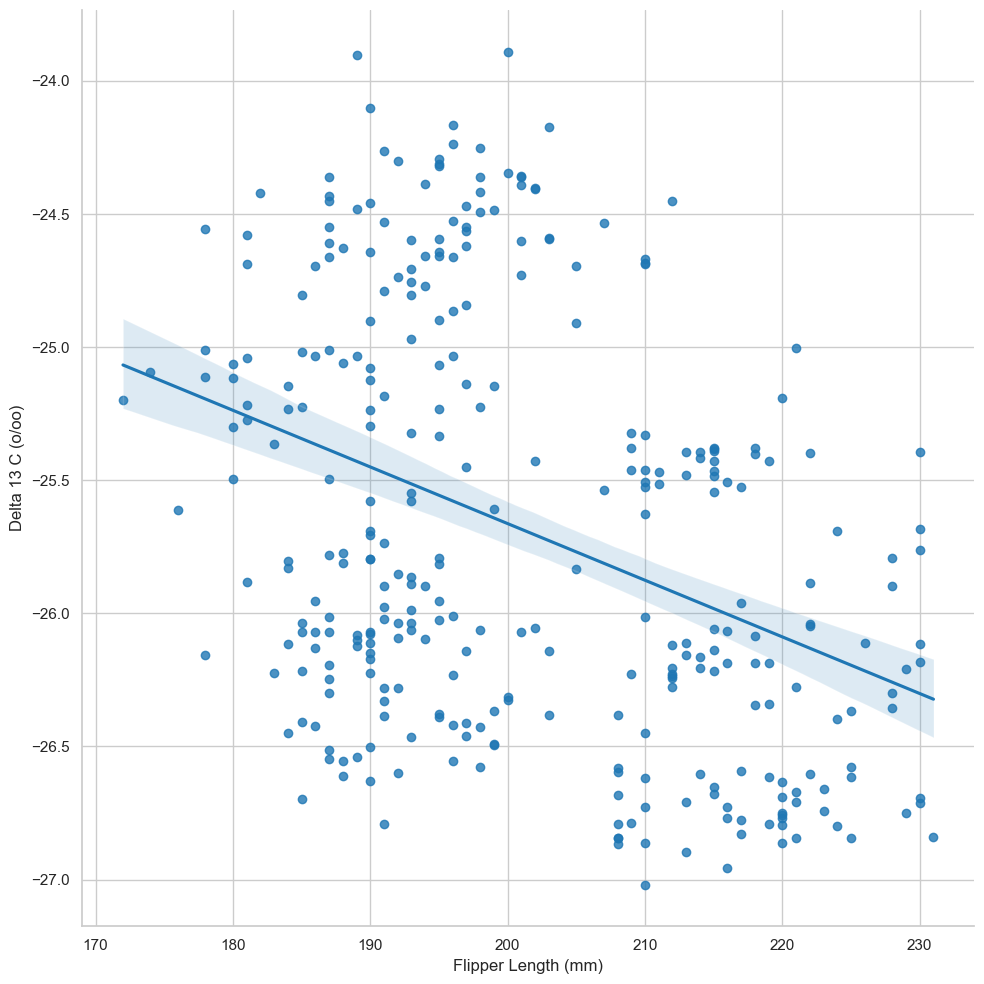

In [112]:
sns.lmplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y = 'Delta 13 C (o/oo)',
    height= 10
)

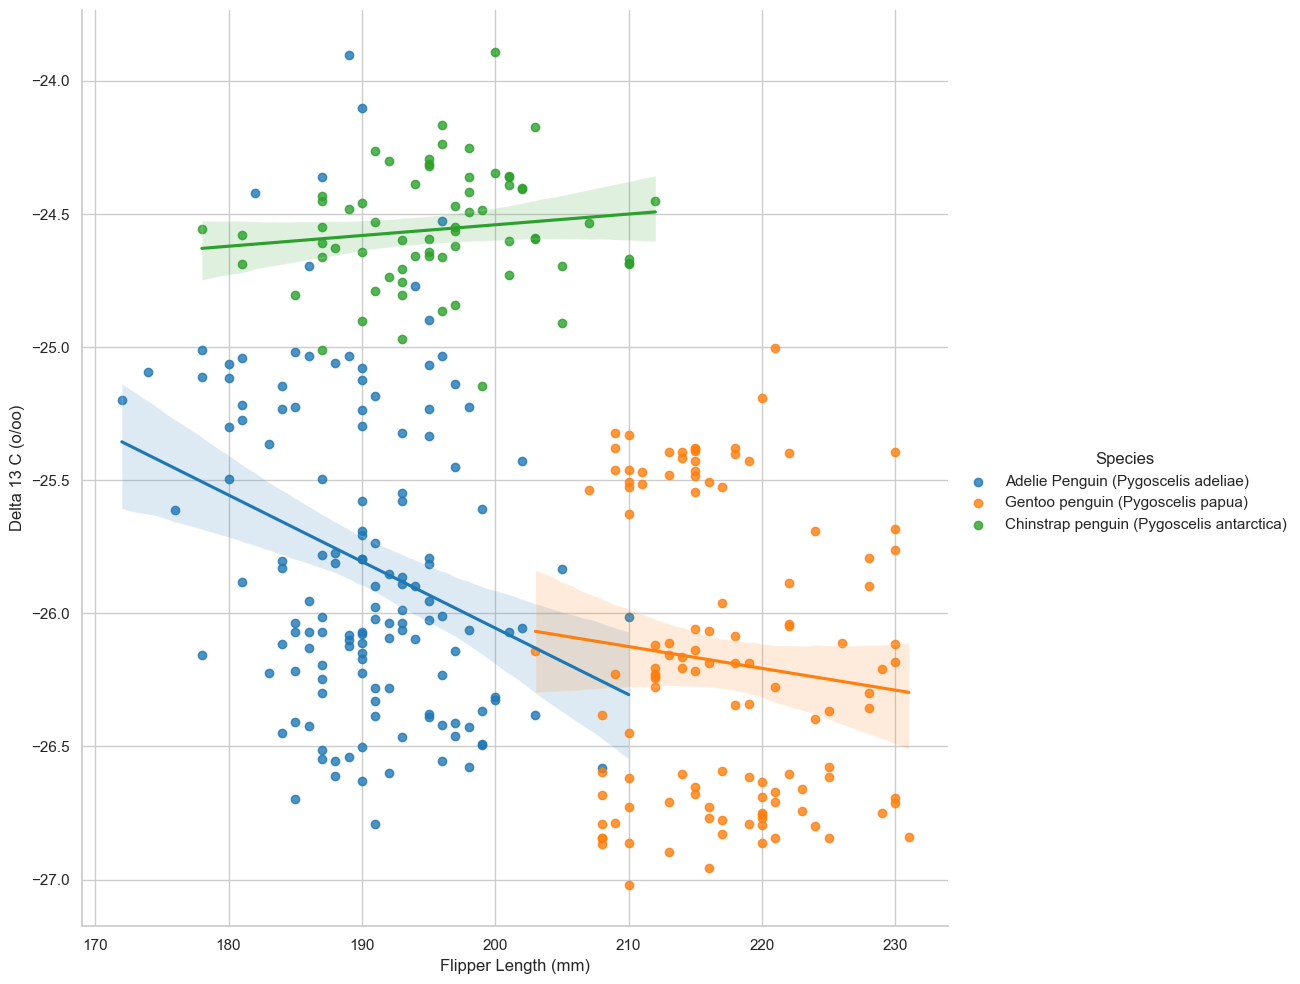

In [113]:
# Distribucion por tipo de Sex
sns.lmplot(
    data=preprocess_penguins_df,
    x='Flipper Length (mm)',
    y = 'Delta 13 C (o/oo)',
    hue = 'Species',
    height= 10
)

# Hay que considerar las variables categoricas para la exploracionde los datos

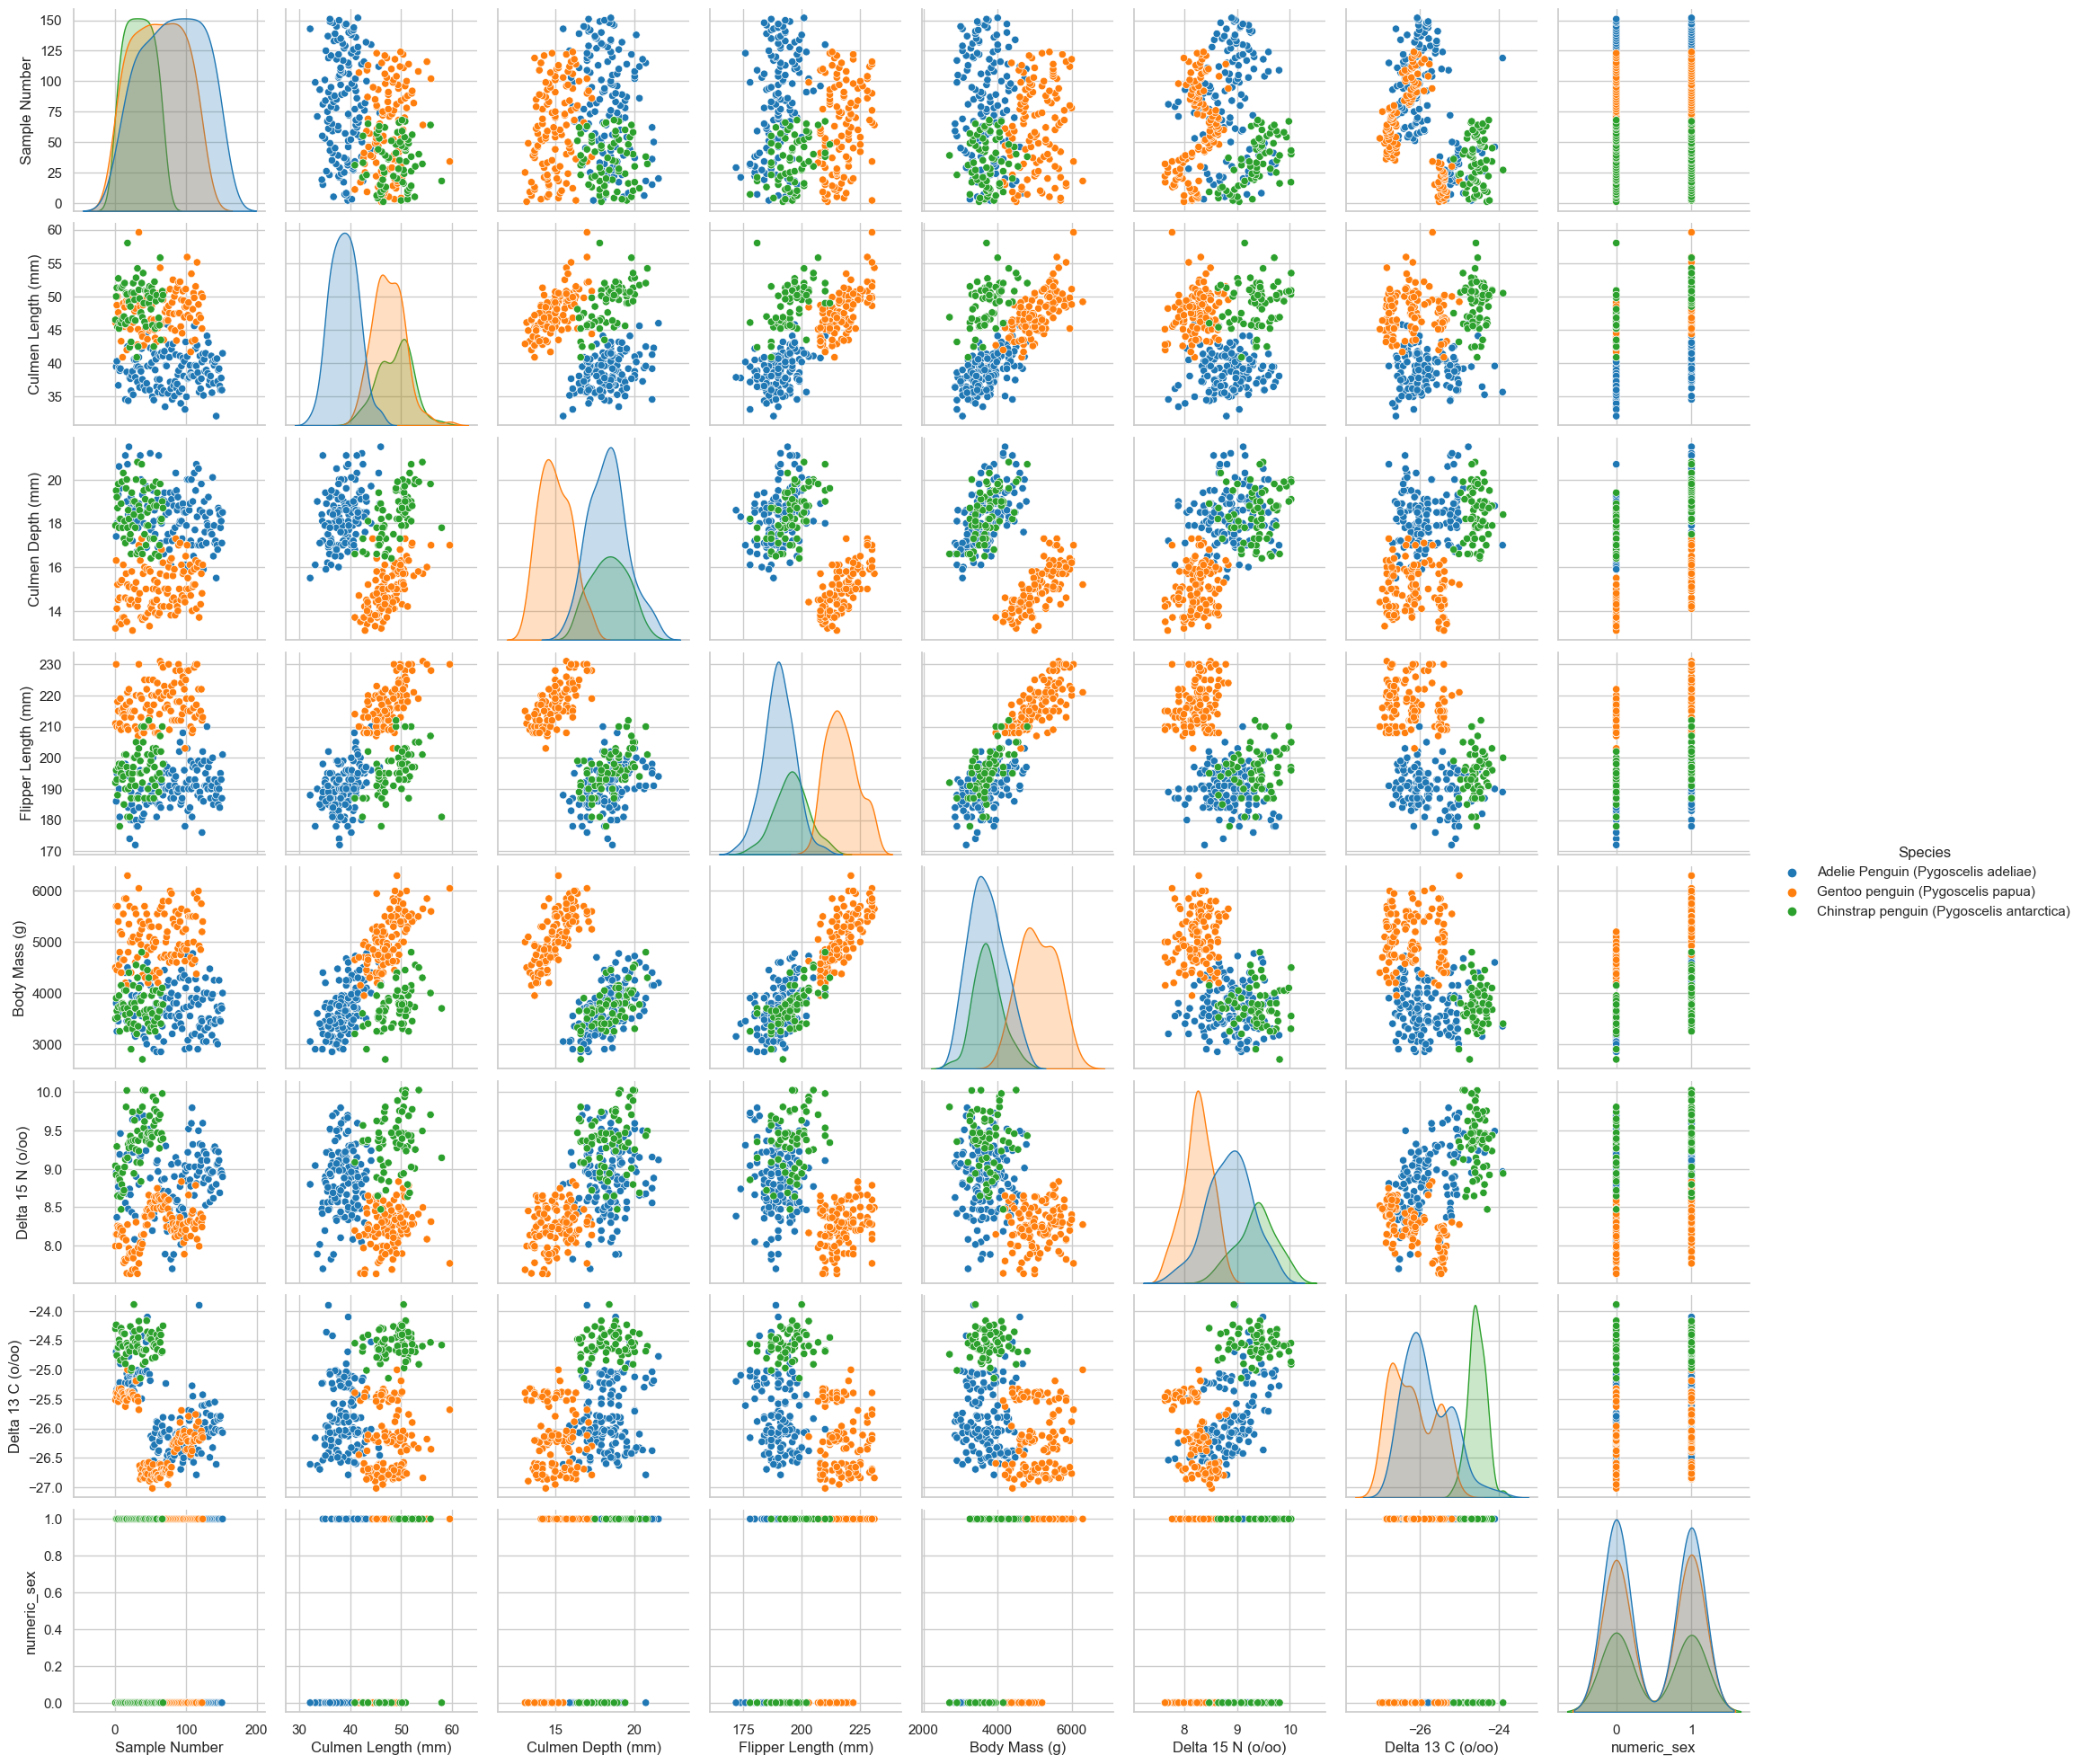

In [114]:
#Resumen del curso lo podemos ver con este grafico

sns.pairplot(
    data = preprocess_penguins_df,
    hue = 'Species'
)

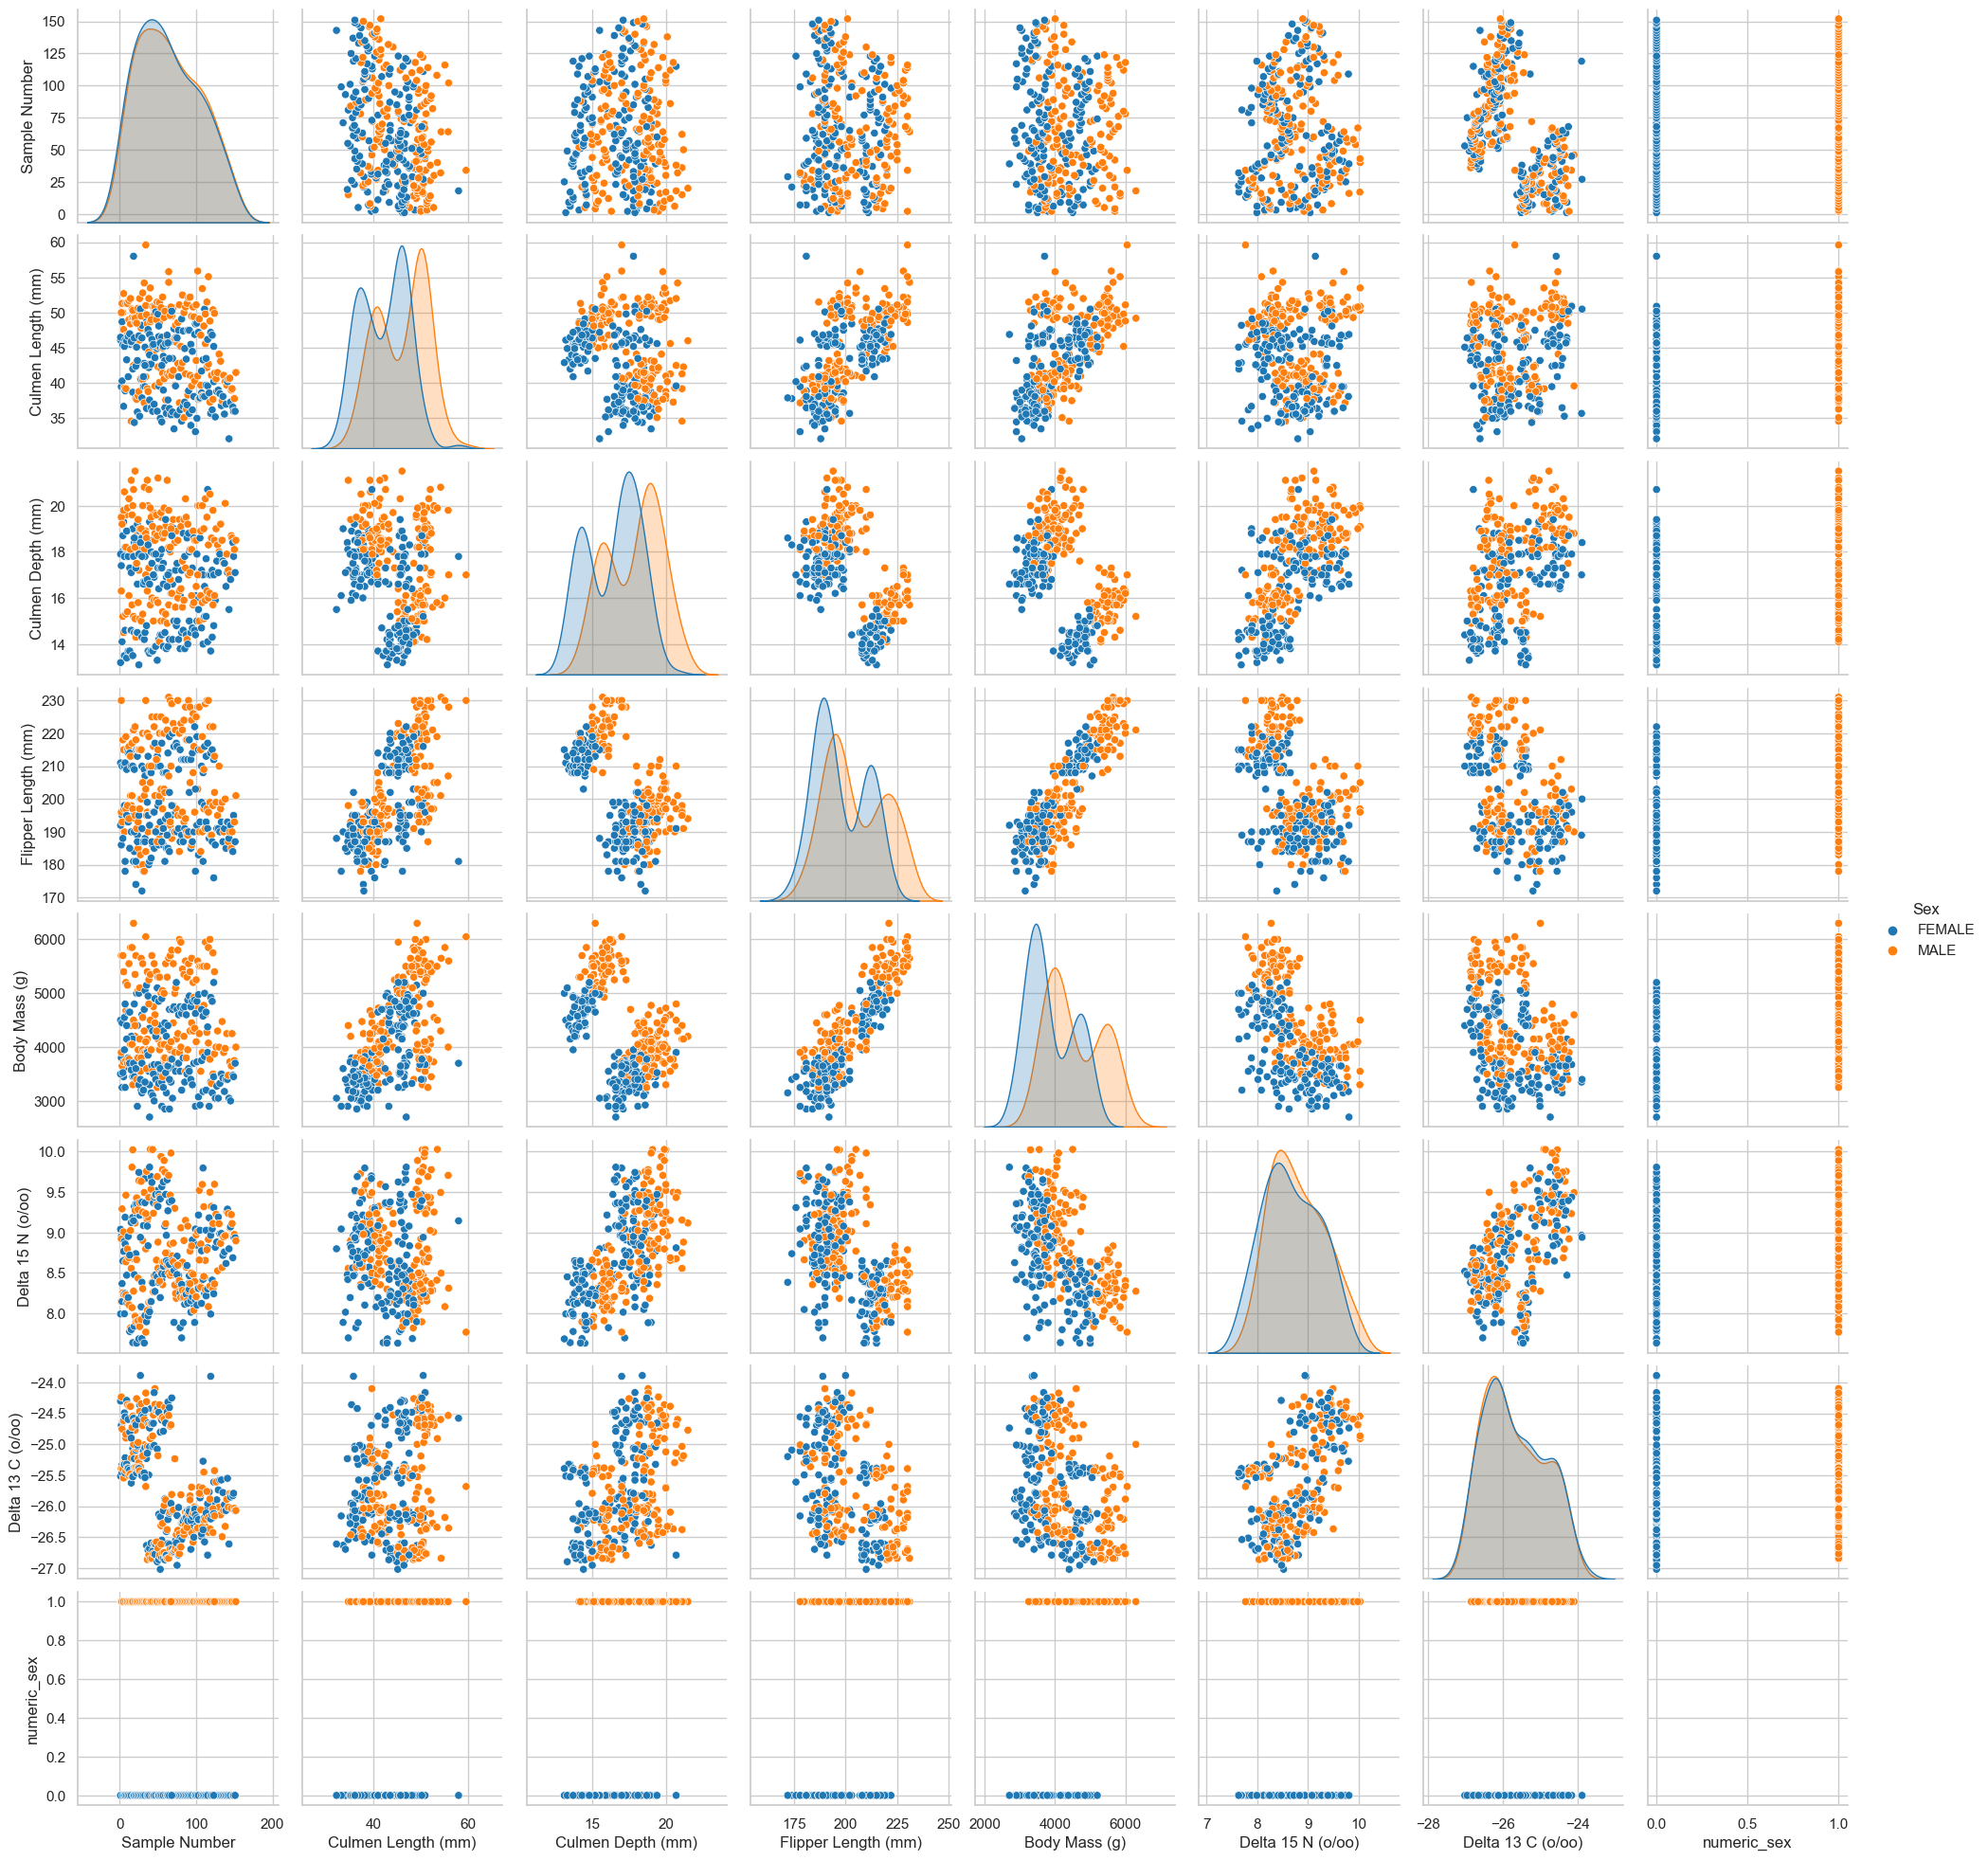

In [115]:

sns.pairplot(
    data = preprocess_penguins_df,
    hue = 'Sex'
)